In [1]:
import pandas as pd
import sqlite3 

In [2]:
conn = sqlite3.connect('watch.db')

In [3]:
# check all the tables present in the database

tables = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table'",conn)
tables

,name
0,activity_data
1,app_events
2,app_sessions
3,daily_scores
4,hrv_data
5,journal_entries
6,sleep_data
7,subscriptions
8,teams
9,team_memberships


In [64]:
#trying to analyze no. of records and structure of each table we have with 5 records from each 

for table in tables ['name'] :
    print('-'*50,f'{table}','-'*50)
    print('Count of record:',pd.read_sql(f"select count(*) as count from {table} ",conn)['count'].values[0])
    display(pd.read_sql(f"select *  from {table} limit 5",conn))

-------------------------------------------------- activity_data --------------------------------------------------
Count of record: 150000


,activity_id,user_id,score_id,activity_start,activity_end,activity_type,strain_score,average_heart_rate,max_heart_rate,calories_burned,distance_km,detected_automatically,gps_enabled
0,a078778,u002488,ds061038,2023-01-02 19:14:00,2023-01-02 19:56:00,Running,3.4,136,158,340,6.22,1,1
1,a078791,u002488,ds061038,2023-01-02 19:56:00,2023-01-02 20:31:00,Strength Training,2.5,126,146,157,0.00,1,0
2,a051000,u001560,ds038116,2023-01-04 07:02:00,2023-01-04 08:22:00,Walking,4.7,124,173,258,7.29,1,1
3,a051021,u001560,ds038116,2023-01-04 07:17:00,2023-01-04 08:31:00,Walking,5.1,124,155,285,5.72,1,1
4,a050983,u001560,ds038116,2023-01-04 07:48:00,2023-01-04 08:31:00,Dance,2.2,113,142,142,0.00,1,0


-------------------------------------------------- app_events --------------------------------------------------
Count of record: 506728


,event_id,user_id,session_id,event_time,event_name,feature_category,screen_name,event_properties,app_version
0,e00000001,u000001,s000001,2023-04-07 21:27:00,app_open,core,splash_screen,"{""source"": ""direct_open"", ""notification_type"":...",4.1.9
1,e00000002,u000001,s000001,2023-04-07 21:27:23,view_journal,journal,journal_entry,"{""date"": ""2023-04-07"", ""has_entry"": true, ""vie...",4.1.9
2,e00000003,u000001,s000001,2023-04-07 21:28:54,view_weekly_report,reports,weekly_report,"{""week_start"": ""2023-04-03"", ""view_duration"": 91}",4.1.9
3,e00000004,u000001,s000001,2023-04-07 21:29:11,app_close,core,None,"{""session_duration"": 131}",4.1.9
4,e00000005,u000001,s000002,2023-03-15 21:12:00,app_open,core,splash_screen,"{""source"": ""system"", ""notification_type"": null}",4.1.9


-------------------------------------------------- app_sessions --------------------------------------------------
Count of record: 100000


,session_id,user_id,session_start,session_end,session_duration_seconds,platform,app_version,is_crashed,entry_point
0,s000001,u000001,2023-04-07 21:27:00,2023-04-07 21:29:11,131,iOS,4.1.9,0,direct_open
1,s000002,u000001,2023-03-15 21:12:00,2023-03-15 21:13:31,91,iOS,4.1.9,0,system
2,s000003,u000001,2023-06-06 22:47:00,2023-06-06 22:49:34,154,iOS,4.1.9,0,system
3,s000004,u000001,2023-02-05 19:57:00,2023-02-05 19:59:11,131,iOS,4.1.9,0,notification
4,s000005,u000001,2023-02-23 21:08:00,2023-02-23 21:09:59,119,iOS,4.1.9,0,system


-------------------------------------------------- daily_scores --------------------------------------------------
Count of record: 122298


,score_id,user_id,date,recovery_score,strain_score,sleep_score,calculated_at,has_journal_entry,active_minutes,is_complete
0,ds000001,u000001,2023-01-26,56,10.5,60,2023-01-26 05:13:00,0,168,1
1,ds000002,u000001,2023-01-27,57,7.5,63,2023-01-27 07:51:00,0,134,1
2,ds000003,u000001,2023-01-31,39,16.6,65,2023-01-31 07:38:00,0,218,1
3,ds000004,u000001,2023-02-11,45,11.9,79,2023-02-11 07:22:00,0,167,1
4,ds000005,u000001,2023-02-14,55,13.5,74,2023-02-14 07:59:00,0,207,1


-------------------------------------------------- hrv_data --------------------------------------------------
Count of record: 183572


,hrv_id,user_id,date,time_of_day,hrv_ms,sample_duration_seconds,related_to_sleep_id
0,hrv000001,u000001,2023-01-25,morning,47.0,300,sl000001
1,hrv000002,u000001,2023-01-25,afternoon,43.1,300,None
2,hrv000003,u000001,2023-01-26,morning,47.1,300,sl000002
3,hrv000004,u000001,2023-01-30,morning,40.6,300,sl000003
4,hrv000005,u000001,2023-01-30,evening,34.3,300,None


-------------------------------------------------- journal_entries --------------------------------------------------
Count of record: 100000


,journal_id,user_id,score_id,entry_date,alcohol_consumed,alcohol_doses,caffeine_consumed,caffeine_mg,medication_taken,late_meal,screen_time_before_bed,stress_level,muscle_soreness,notes,custom_tags
0,j000001,u000001,ds000011,2023-03-05,0,0,1,326,0,0,1,5,1,Agent every development say quality.,"{""tags"": [""recovery""]}"
1,j000002,u000001,ds000013,2023-03-15,0,0,1,357,0,0,1,7,3,Beautiful instead ahead despite measure ago cu...,"{""tags"": [""morning_workout""]}"
2,j000003,u000001,ds000015,2023-03-17,0,0,1,118,0,0,1,8,3,Everything thank serve civil institution every...,"{""tags"": [""late_meal"", ""work_stress""]}"
3,j000004,u000001,ds000019,2023-04-07,1,2,0,0,0,0,1,4,1,Suggest page southern role movie win her need.,"{""tags"": [""hydration"", ""alcohol""]}"
4,j000005,u000001,ds000020,2023-04-10,0,0,1,180,0,0,1,7,4,Feeling tired.,"{""tags"": [""good_sleep"", ""poor_sleep""]}"


-------------------------------------------------- sleep_data --------------------------------------------------
Count of record: 122298


,sleep_id,user_id,score_id,sleep_start,sleep_end,time_in_bed_minutes,total_sleep_minutes,rem_sleep_minutes,deep_sleep_minutes,light_sleep_minutes,awake_minutes,sleep_latency_minutes,disturbances,respiratory_rate,is_nap
0,sl000001,u000001,ds000001,2023-01-25 21:47:00,2023-01-26 02:06:00,259,252,46,50,127,7,14,2,12.6,0
1,sl000002,u000001,ds000002,2023-01-26 23:38:00,2023-01-27 03:48:00,250,244,54,43,122,6,11,2,16.3,0
2,sl000003,u000001,ds000003,2023-01-30 22:21:00,2023-01-31 03:04:00,283,277,55,43,161,6,16,6,13.8,0
3,sl000004,u000001,ds000004,2023-02-10 22:34:00,2023-02-11 04:33:00,359,330,70,68,154,29,15,5,13.5,0
4,sl000005,u000001,ds000005,2023-02-13 23:14:00,2023-02-14 05:20:00,366,364,84,64,180,2,15,2,14.4,0


-------------------------------------------------- subscriptions --------------------------------------------------
Count of record: 5000


,subscription_id,user_id,subscription_start_date,subscription_end_date,plan_type,initial_price,renewal_price,currency,payment_method,is_canceled,cancellation_date,cancellation_reason
0,sub000001,u000001,2023-01-26 00:00:00,2023-02-25 00:00:00,monthly,30.0,30.0,BRL,apple_pay,1,2023-02-23 00:00:00,privacy_concerns
1,sub000002,u000002,2023-01-16 00:00:00,2023-02-15 00:00:00,monthly,30.0,30.0,USD,credit_card,1,2023-02-14 00:00:00,found_better_app
2,sub000003,u000003,2023-01-25 00:00:00,2023-02-24 00:00:00,monthly,30.0,30.0,BRL,apple_pay,0,None,None
3,sub000004,u000004,2023-03-07 00:00:00,2023-04-06 00:00:00,monthly,30.0,30.0,USD,apple_pay,0,None,None
4,sub000005,u000005,2023-02-19 00:00:00,2023-03-21 00:00:00,monthly,30.0,30.0,USD,paypal,1,2023-03-19 00:00:00,privacy_concerns


-------------------------------------------------- teams --------------------------------------------------
Count of record: 500


,team_id,team_name,created_at,created_by_user_id,team_type,is_private,member_count
0,team001,Night Living,2023-06-13 00:00:00,u004468,lifestyle,0,30
1,team002,Endurance Achievers,2023-06-11 00:00:00,u004465,goal,0,36
2,team003,Office Team,2023-03-01 00:00:00,u003463,social,1,19
3,team004,Mindful Birds,2023-05-11 00:00:00,u004946,lifestyle,0,51
4,team005,Global Yogis,2023-05-11 00:00:00,u002963,activity,0,37


-------------------------------------------------- team_memberships --------------------------------------------------
Count of record: 13196


,membership_id,team_id,user_id,joined_at,membership_status,is_admin,share_recovery,share_strain,share_sleep
0,tm000001,team001,u004468,2023-06-13 00:00:00,active,1,1,1,1
1,tm000002,team001,u000913,2023-06-26 00:00:00,active,0,1,0,1
2,tm000003,team001,u000205,2023-06-15 00:00:00,active,0,1,1,1
3,tm000004,team001,u002254,2023-06-14 00:00:00,active,0,1,0,1
4,tm000005,team001,u002007,2023-06-30 00:00:00,active,0,1,1,1


-------------------------------------------------- users --------------------------------------------------
Count of record: 5000


,user_id,created_at,country,device_model,app_platform,app_version,age_group,gender,acquisition_source,notification_enabled,last_sync_date,calibration_complete,is_active
0,u000001,2023-01-26 00:00:00,Brazil,PeakPulse 3.0,iOS,4.1.9,45-54,Female,Instagram Ad,1,2023-06-12 00:00:00,0,0
1,u000002,2023-01-16 00:00:00,USA,PeakPulse 3.0,iOS,4.1.5,25-34,Male,Facebook Ad,1,2023-04-15 00:00:00,1,0
2,u000003,2023-01-25 00:00:00,Brazil,PeakPulse 3.0,iOS,4.1.5,55-64,Male,Podcast Sponsor,0,2023-06-26 00:00:00,1,1
3,u000004,2023-03-07 00:00:00,USA,PeakPulse 3.0,iOS,4.2.0,18-24,Male,Facebook Ad,1,2023-06-30 00:00:00,1,1
4,u000005,2023-02-19 00:00:00,USA,PeakPulse 3.0,iOS,4.1.5,55-64,Male,Referral,0,2023-06-29 00:00:00,1,1


# Part 1: Data Exploration & Analysis
  
 ## Task 1 : Analyze user retention patterns over the past 3 months
  
Using the users.csv and app_sessions.csv files, I have created a cohort retention analysis to address the first task.


In [21]:
#-- Step 1: Create a view for user cohorts filtered to the last 3 months only
# Most recent signup date = '2023-06-08', so I take from '2023-03-08' to '2023-06-08'

conn.execute("DROP VIEW IF EXISTS user_cohort;")

conn.execute("""
CREATE VIEW user_cohort AS
SELECT 
    user_id,
    signup_date,
    -- Group signup into 15-day cohorts starting from 2023-03-08
    DATE(STRFTIME('%Y-%m-%d', 
        JULIANDAY('2023-03-08') + 
        (CAST((JULIANDAY(signup_date) - JULIANDAY('2023-03-08')) / 15 AS INTEGER) * 15)
    )) AS cohort_group
FROM (
    SELECT 
        user_id, 
        DATE(created_at) AS signup_date
    FROM users
    WHERE created_at IS NOT NULL
);
""")


In [22]:
#--- step 2 : Create a view that captures all the unique days users had app sessions

conn.execute("DROP VIEW IF EXISTS user_session_days;")

conn.execute("""
CREATE VIEW user_session_days AS
SELECT 
    user_id,
    DATE(session_start) AS session_date
FROM app_sessions
WHERE session_start IS NOT NULL
GROUP BY user_id, session_date;
""")


In [23]:
# --- Step 3: Create a view that captures how many days after signup users had sessions

conn.execute("DROP VIEW IF EXISTS retention_events;")

conn.execute("""
CREATE VIEW retention_events AS
SELECT 
    uc.cohort_group,
    usd.user_id,
    julianday(usd.session_date) - julianday(uc.signup_date) AS days_after_signup
FROM user_session_days usd
JOIN user_cohort uc ON usd.user_id = uc.user_id
WHERE days_after_signup >= 0
GROUP BY uc.cohort_group, usd.user_id, days_after_signup;
""")



In [15]:
#----- Step 4: Aggregate retention counts at D1, D7, D30, D60, and D90

query = """
SELECT 
    cohort_group,
    COUNT(DISTINCT uc.user_id) AS cohort_size,
    SUM(CASE WHEN re.days_after_signup = 1 THEN 1 ELSE 0 END) AS day_1_retained,
    SUM(CASE WHEN re.days_after_signup = 7 THEN 1 ELSE 0 END) AS day_7_retained,
    SUM(CASE WHEN re.days_after_signup = 30 THEN 1 ELSE 0 END) AS day_30_retained,
    SUM(CASE WHEN re.days_after_signup = 60 THEN 1 ELSE 0 END) AS day_60_retained,
    SUM(CASE WHEN re.days_after_signup = 90 THEN 1 ELSE 0 END) AS day_90_retained
FROM user_cohort uc
LEFT JOIN retention_events re ON uc.user_id = re.user_id
GROUP BY cohort_group
ORDER BY cohort_group ASC;
"""

retention_df = pd.read_sql(query, conn)
retention_df


,signup_date,cohort_size,day_1_retained,day_7_retained,day_30_retained,day_60_retained,day_90_retained
0,2023-03-08,45,5,5,7,5,0
1,2023-03-09,46,3,6,6,5,7
2,2023-03-10,41,9,5,4,4,1
3,2023-03-11,49,7,7,13,5,5
4,2023-03-12,55,4,11,9,6,8


In [27]:
# Calculate retention rate as a percentage of the cohort size

# Copy for rate calculation
retention_rate_df = retention_df.copy()

# Convert signup_date to datetime
retention_rate_df['signup_date'] = pd.to_datetime(retention_rate_df['signup_date'])

# Create 15-day cohort groups
retention_rate_df['cohort_group'] = retention_rate_df['signup_date'].apply(
    lambda x: f"{x.strftime('%Y-%m')}-{'01' if x.day <= 15 else '16'}"
)


In [28]:
# Group by 15-day cohort and aggregate values
cohort_summary = retention_rate_df.groupby('cohort_group').agg({
    'cohort_size': 'sum',
    'day_1_retained': 'sum',
    'day_7_retained': 'sum',
    'day_30_retained': 'sum',
    'day_60_retained': 'sum',
    'day_90_retained': 'sum'
}).reset_index()

# Calculate retention rates
for day in [1, 7, 30, 60, 90]:
    cohort_summary[f'day_{day}_rate'] = round(
        100 * cohort_summary[f'day_{day}_retained'] / cohort_summary['cohort_size'], 2
    )


In [29]:
cohort_summary[['cohort_group', 'cohort_size', 
                'day_1_rate', 'day_7_rate', 
                'day_30_rate', 'day_60_rate', 'day_90_rate']]


,cohort_group,cohort_size,day_1_rate,day_7_rate,day_30_rate,day_60_rate,day_90_rate
0,2023-03-01,374,14.97,16.31,17.38,13.64,14.44
1,2023-03-16,530,14.72,17.17,17.36,17.36,17.92
2,2023-04-01,301,16.94,17.28,18.27,10.96,2.33
3,2023-04-16,164,21.34,26.83,20.12,24.39,0.00
4,2023-05-01,59,16.95,20.34,10.17,5.08,0.00
5,2023-05-16,21,33.33,19.05,23.81,0.00,0.00


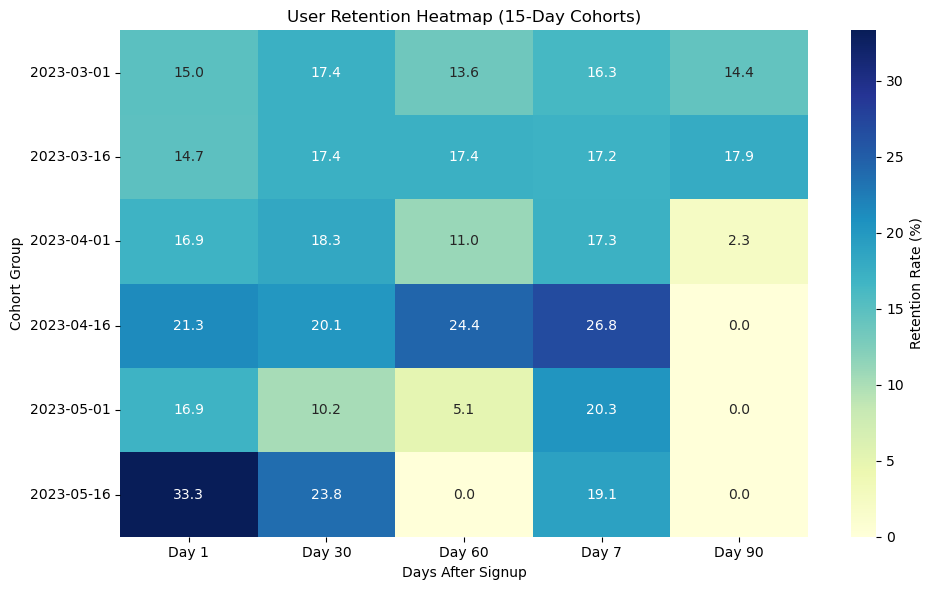

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Reshape for heatmap
heatmap_df = cohort_summary.melt(
    id_vars='cohort_group',
    value_vars=['day_1_rate', 'day_7_rate', 'day_30_rate', 'day_60_rate', 'day_90_rate'],
    var_name='Day',
    value_name='Retention Rate (%)'
)

# Improve day labels
heatmap_df['Day'] = heatmap_df['Day'].str.replace('_rate', '').str.replace('day_', 'Day ')

# Pivot for heatmap
pivot = heatmap_df.pivot(index='cohort_group', columns='Day', values='Retention Rate (%)')

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot, annot=True, fmt=".1f", cmap='YlGnBu', cbar_kws={'label': 'Retention Rate (%)'})
plt.title("User Retention Heatmap (15-Day Cohorts)")
plt.ylabel("Cohort Group")
plt.xlabel("Days After Signup")
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


#### User Retention Heatmap (15-Day Cohorts)

- heatmap of 15-day cohorts showing retention trends across key post-signup days.
- Highlights the same metrics as the second heatmap but may differ slightly in data arrangement or sorting.
- Confirms similar insights: strong early retention followed by steep drop-offs after Day 30.
- 2023-04-16 again exhibits consistent retention through Day 60.
- Helps validate trends seen in other visualizations and gives confidence in cohort segmentation.


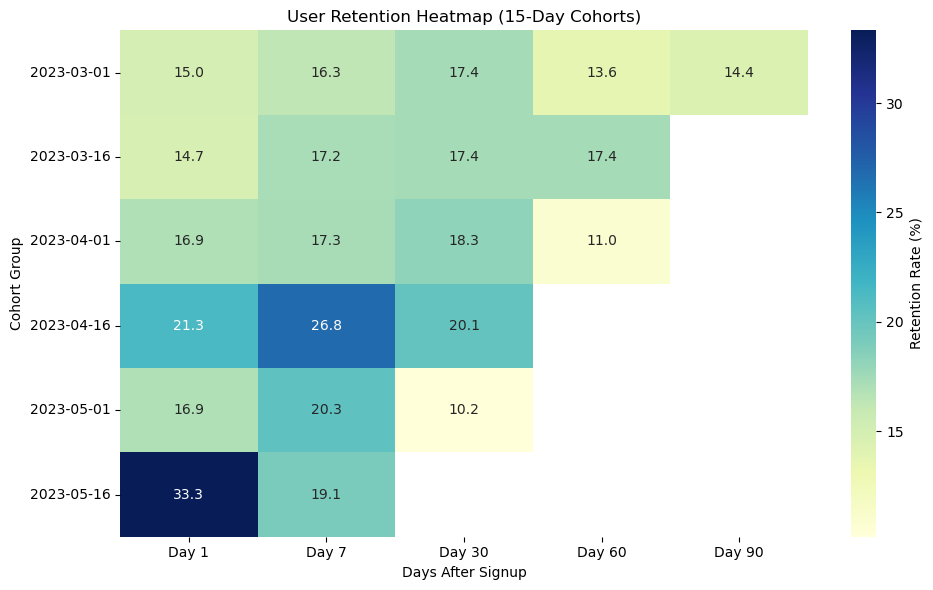

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Re-melt the data 
heatmap_df = cohort_summary.melt(
    id_vars='cohort_group',
    value_vars=['day_1_rate', 'day_7_rate', 'day_30_rate', 'day_60_rate', 'day_90_rate'],
    var_name='Day',
    value_name='Retention Rate (%)'
)

# Improved day labels
heatmap_df['Day'] = heatmap_df['Day'].str.replace('_rate', '').str.replace('day_', 'Day ')

# Pivot for heatmap
pivot = heatmap_df.pivot(index='cohort_group', columns='Day', values='Retention Rate (%)')

# Reorder columns
pivot = pivot[['Day 1', 'Day 7', 'Day 30', 'Day 60', 'Day 90']]

# Triangular masking: remove values where cohort is too recent for that day
cohort_cutoff_dates = {
    'Day 1': pd.to_datetime('2023-06-07'),
    'Day 7': pd.to_datetime('2023-06-01'),
    'Day 30': pd.to_datetime('2023-05-09'),
    'Day 60': pd.to_datetime('2023-04-09'),
    'Day 90': pd.to_datetime('2023-03-10')
}

# Mask future dates where retention isn't yet measurable
for day, cutoff in cohort_cutoff_dates.items():
    pivot.loc[pd.to_datetime(pivot.index) > cutoff, day] = np.nan

# Plot triangular heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot, annot=True, fmt=".1f", cmap='YlGnBu', cbar_kws={'label': 'Retention Rate (%)'},
            mask=pivot.isnull())
plt.title("User Retention Heatmap (15-Day Cohorts)")
plt.ylabel("Cohort Group")
plt.xlabel("Days After Signup")
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


#### User Retention Heatmap (15-Day Cohorts – Alternate View)

- Visualizes user retention over Days 1, 7, 30, 60, and 90 for 15-day signup cohorts.
- Retention is color-coded, with darker shades indicating higher retention rates.
- The 2023-04-16 cohort stands out with high retention at Day 30 (24.4%) and Day 60 (26.8%).
- The most recent cohort (2023-05-16) has the highest Day 1 retention (33.3%) but drops to 0% by Day 60.
- Useful for identifying strong and weak cohorts for deeper behavioral analysis.

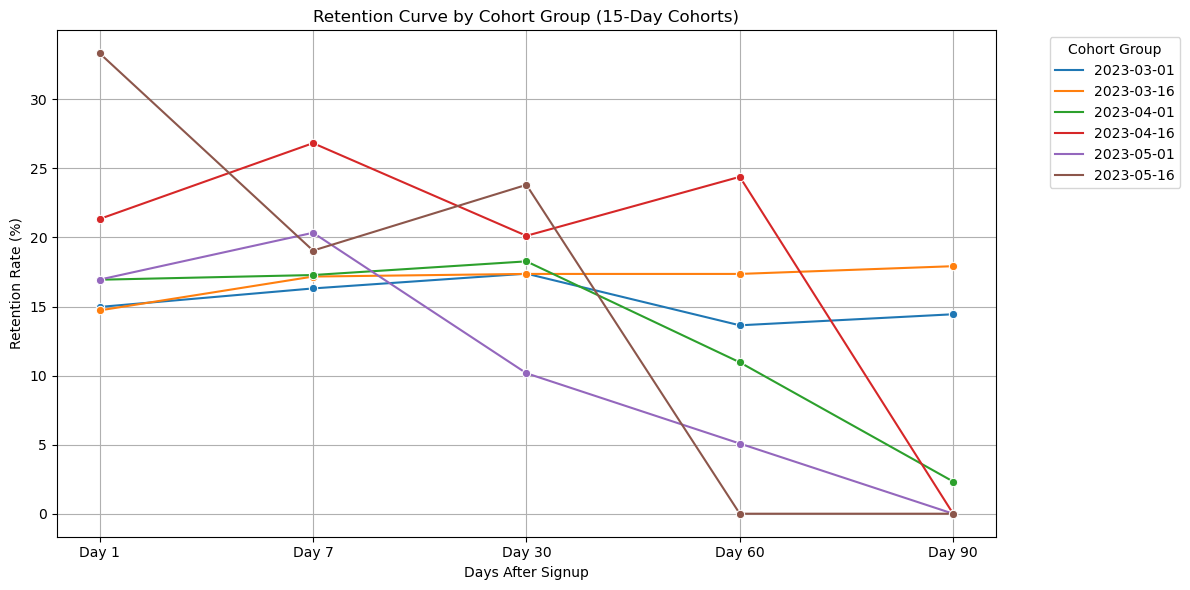

In [33]:
# Prepare line chart data
line_df = heatmap_df.dropna()  # Drop NaNs for clean plotting

# Plot line chart
plt.figure(figsize=(12, 6))
sns.lineplot(data=line_df, x='Day', y='Retention Rate (%)', hue='cohort_group', marker='o')

plt.title('Retention Curve by Cohort Group (15-Day Cohorts)')
plt.xlabel('Days After Signup')
plt.ylabel('Retention Rate (%)')
plt.legend(title='Cohort Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


#### Retention Curve by Cohort Group (15-Day Cohorts)

- A line graph comparing user retention trends over time for each cohort.
- Retention percentages are plotted for Days 1, 7, 30, 60, and 90.
- The 2023-04-16 cohort maintains relatively high retention across all days.
- The 2023-05-16 cohort peaks early but shows the sharpest decline.
- Reveals retention trajectory and lets you compare how quickly different cohorts disengage.

In [34]:
#  round retention rates for cleaner output
cohort_summary_rounded = cohort_summary.copy()
rate_cols = ['day_1_rate', 'day_7_rate', 'day_30_rate', 'day_60_rate', 'day_90_rate']
cohort_summary_rounded[rate_cols] = cohort_summary_rounded[rate_cols].round(2)

# Export to CSV
cohort_summary_rounded.to_csv('retention_cohort_summary_15day.csv', index=False)

print("✅ Cohort table exported as 'retention_cohort_summary_15day.csv'")


✅ Cohort table exported as 'retention_cohort_summary_15day.csv'


## Task 2 : Identify which features correlate most strongly with user retention

#### Using the following tables:

users, app_sessions, app_events, daily_scores, journal_entries, subscriptions, team_memberships, and challenge_participation,
I will conduct feature engineering, funnel analysis, and EDA to investigate which user behaviors and attributes are most predictive of Day 30 retention.

I will:

1. Label users as retained (1) or not retained (0) based on 30-day post-signup activity.
2. Engineer relevant features across multiple tables.
3. Analyze funnel drop-offs and conversion at each stage.
4. Use correlation/statistical analysis to rank top features influencing retention.

In [11]:
import sqlite3

# Reconnect to database
conn = sqlite3.connect('database.db')

# Test the connection by running a quick query
import pandas as pd
pd.read_sql("SELECT name FROM sqlite_master WHERE type='table';", conn)


,name
0,activity_data
1,app_events
2,app_sessions
3,daily_scores
4,hrv_data
5,journal_entries
6,sleep_data
7,subscriptions
8,teams
9,team_memberships


#### Objective:

Identify which product features or user behaviors correlate most strongly with whether a user is retained on Day 30 after signup.
I'll define a retained_30 flag (1 if the user was active on Day 30, 0 otherwise), and join with potential feature sources.


##### Step 1: Define Day 30 Retention

- Create a binary target variable:

- retained_30 = 1 if user had a session exactly 30 days after signup.

- therwise retained_30 = 0.

- Tables Used:

  - users (to get signup date)

  - app_sessions (to see if user was active 30 days later)

##### Step 2: Feature Engineering

- Aggregate or join features from:

  - users: demographics, acquisition, device

  - subscriptions: subscription status, plan, cancellation

  - daily_scores: journaling, activity levels

  - sleep_data: sleep minutes, REM, etc.

  - journal_entries: lifestyle habits

  - app_sessions: session count, crashes

  - app_events: feature usage 

##### Step 3: Correlation Analysis & Feature Importance

 - After creating the final dataset:

   - Perform correlation analysis.

   - Run logistic regression or decision tree to interpret important features.

In [12]:
# Step 1.1: Create a view to store user_id and signup date
conn.execute("DROP VIEW IF EXISTS user_cohort;")
conn.execute("""
CREATE VIEW user_cohort AS
SELECT 
    user_id, 
    DATE(created_at) AS signup_date
FROM users
WHERE created_at IS NOT NULL;
""")


In [13]:
# Step 1.2: Get the days users were active after signup
conn.execute("DROP VIEW IF EXISTS user_session_days;")
conn.execute("""
CREATE VIEW user_session_days AS
SELECT 
    s.user_id,
    DATE(s.session_start) AS session_date
FROM app_sessions s
WHERE s.session_start IS NOT NULL
GROUP BY s.user_id, DATE(s.session_start);
""")


In [14]:
# Step 1.3: Mark users who were active exactly 30 days after signup
conn.execute("DROP VIEW IF EXISTS user_retention_30;")
conn.execute("""
CREATE VIEW user_retention_30 AS
SELECT 
    uc.user_id,
    CASE 
        WHEN COUNT(usd.session_date) > 0 THEN 1
        ELSE 0
    END AS retained_30
FROM user_cohort uc
LEFT JOIN user_session_days usd
    ON uc.user_id = usd.user_id
   AND julianday(usd.session_date) - julianday(uc.signup_date) = 30
GROUP BY uc.user_id;
""")


In [15]:
# Load user_id and retained_30 label
retention_label_df = pd.read_sql("SELECT * FROM user_retention_30;", conn)
retention_label_df.head()


,user_id,retained_30
0,u000001,0
1,u000002,0
2,u000003,1
3,u000004,0
4,u000005,1




- I used the users and app_sessions tables to generate a binary retained_30 label for each user:

  - 1 → User was active exactly 30 days after signup.

  - 0 → User was not active on Day 30.

- Next steps:

  - Feature Engineering: Extract relevant user behaviors and characteristics.

  - Funnel Analysis: Track engagement patterns that lead to Day 30 retention.

  - Correlation & Modeling: Identify top features correlated with retained_30.

In [16]:
import sqlite3
import pandas as pd

# Connect to the SQLite database
conn = sqlite3.connect("database.db")

# Load the target label (retained_30)
retention_df = pd.read_sql("""
    SELECT 
        u.user_id,
        u.created_at AS signup_date,
        CASE 
            WHEN EXISTS (
                SELECT 1 FROM app_sessions s
                WHERE s.user_id = u.user_id
                AND DATE(s.session_start) = DATE(u.created_at, '+30 days')
            ) THEN 1 ELSE 0 
        END AS retained_30
    FROM users u
""", conn)


In [17]:
# User Demographics & App Info

user_features = pd.read_sql("""
    SELECT 
        user_id,
        country,
        device_model,
        app_platform,
        app_version,
        age_group,
        gender,
        acquisition_source,
        notification_enabled,
        calibration_complete
    FROM users
""", conn)


In [18]:
# App Sessions in First 7 Days

session_features = pd.read_sql("""
    SELECT 
        u.user_id,
        COUNT(s.session_id) AS session_count_7d,
        SUM(s.session_duration_seconds) AS total_duration_7d,
        COUNT(DISTINCT DATE(s.session_start)) AS active_days_7d
    FROM users u
    LEFT JOIN app_sessions s ON u.user_id = s.user_id
        AND DATE(s.session_start) BETWEEN DATE(u.created_at) AND DATE(u.created_at, '+6 days')
    GROUP BY u.user_id
""", conn)


In [19]:
# Daily Scores in First 7 Days

daily_scores_features = pd.read_sql("""
    SELECT 
        u.user_id,
        COUNT(ds.score_id) AS score_days_7d,
        AVG(ds.recovery_score) AS avg_recovery_7d,
        AVG(ds.sleep_score) AS avg_sleep_7d,
        AVG(ds.strain_score) AS avg_strain_7d,
        SUM(ds.active_minutes) AS total_active_minutes_7d
    FROM users u
    LEFT JOIN daily_scores ds ON u.user_id = ds.user_id
        AND DATE(ds.date) BETWEEN DATE(u.created_at) AND DATE(u.created_at, '+6 days')
    GROUP BY u.user_id
""", conn)


In [20]:
# Merge All Features and Target Variable
# Merge everything into a final dataframe
feature_df = retention_df \
    .merge(user_features, on='user_id', how='left') \
    .merge(session_features, on='user_id', how='left') \
    .merge(daily_scores_features, on='user_id', how='left')

# Show preview
feature_df.head()


,user_id,signup_date,retained_30,country,device_model,app_platform,app_version,age_group,gender,acquisition_source,notification_enabled,calibration_complete,session_count_7d,total_duration_7d,active_days_7d,score_days_7d,avg_recovery_7d,avg_sleep_7d,avg_strain_7d,total_active_minutes_7d
0,u000001,2023-01-26 00:00:00,0,Brazil,PeakPulse 3.0,iOS,4.1.9,45-54,Female,Instagram Ad,1,0,0,NaN,0,3,50.666667,62.666667,11.533333,520.0
1,u000002,2023-01-16 00:00:00,0,USA,PeakPulse 3.0,iOS,4.1.5,25-34,Male,Facebook Ad,1,1,0,NaN,0,0,NaN,NaN,NaN,NaN
2,u000003,2023-01-25 00:00:00,1,Brazil,PeakPulse 3.0,iOS,4.1.5,55-64,Male,Podcast Sponsor,0,1,0,NaN,0,0,NaN,NaN,NaN,NaN
3,u000004,2023-03-07 00:00:00,0,USA,PeakPulse 3.0,iOS,4.2.0,18-24,Male,Facebook Ad,1,1,0,NaN,0,0,NaN,NaN,NaN,NaN
4,u000005,2023-02-19 00:00:00,1,USA,PeakPulse 3.0,iOS,4.1.5,55-64,Male,Referral,0,1,0,NaN,0,1,58.000000,93.000000,17.800000,258.0


In [21]:
# Step 2.1 – Preprocessing: Prepare Retention Flag and Feature Data

# Load required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

# Reconnect to database if not already connected
conn = sqlite3.connect("database.db")

# Load 'users' table
users_df = pd.read_sql_query("SELECT * FROM users", conn)

# Load 'app_sessions' to get the retained_30 label
app_sessions_df = pd.read_sql_query("SELECT * FROM app_sessions", conn)

# Precompute 'retained_30' flag (already done, but reloading for safety)
retention_flag_df = pd.read_sql_query("""
SELECT 
    u.user_id,
    CASE WHEN COUNT(s.session_id) > 0 THEN 1 ELSE 0 END AS retained_30
FROM users u
LEFT JOIN app_sessions s 
    ON u.user_id = s.user_id 
    AND DATE(s.session_start) = DATE(u.created_at, '+30 days')
GROUP BY u.user_id
""", conn)

# Merge the retention flag back into the users_df
users_df = users_df.merge(retention_flag_df, on='user_id', how='left')

# Fill any nulls in retained_30 with 0 (i.e., not retained)
users_df['retained_30'] = users_df['retained_30'].fillna(0).astype(int)

# Preview
users_df[['user_id', 'created_at', 'retained_30']].head()


,user_id,created_at,retained_30
0,u000001,2023-01-26 00:00:00,0
1,u000002,2023-01-16 00:00:00,0
2,u000003,2023-01-25 00:00:00,1
3,u000004,2023-03-07 00:00:00,0
4,u000005,2023-02-19 00:00:00,1


Top Positive Correlations:
age_group_45-54                  0.024993
country_Japan                    0.018163
country_Canada                   0.017398
country_UK                       0.015434
app_version_4.2.1                0.013603
acquisition_source_Referral      0.012531
acquisition_source_YouTube Ad    0.012196
calibration_complete             0.008513
age_group_55-64                  0.005938
gender_Male                      0.004241
Name: retained_30, dtype: float64


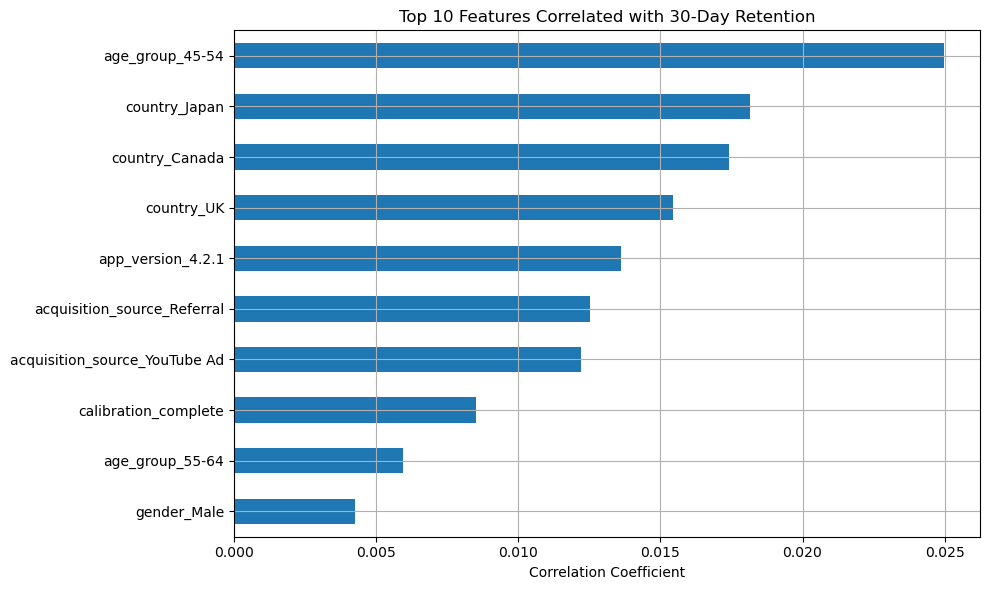

In [22]:
# Step 2.2 – Correlation Analysis: Check Feature Importance vs Retention
# analyze which features from the users table correlate with the retained_30 flag.

# Convert categorical columns to dummy/one-hot encoding
categorical_cols = ['country', 'device_model', 'app_platform', 'app_version',
                    'age_group', 'gender', 'acquisition_source']

users_encoded = pd.get_dummies(users_df[categorical_cols + ['notification_enabled', 'calibration_complete']], drop_first=True)

# Add the retained_30 column
users_encoded['retained_30'] = users_df['retained_30']

# Compute correlations with retention
correlations = users_encoded.corr()['retained_30'].sort_values(ascending=False)

# Display top positive correlations
print("Top Positive Correlations:")
print(correlations[1:11])  # excluding 'retained_30' itself

# Plot the top 10 features correlated with retention
plt.figure(figsize=(10,6))
correlations[1:11].plot(kind='barh')
plt.title('Top 10 Features Correlated with 30-Day Retention')
plt.xlabel('Correlation Coefficient')
plt.gca().invert_yaxis()
plt.grid(True)
plt.tight_layout()
plt.show()


#### Top 10 Features Correlated with 30-Day Retention

- Displays the top 10 static features most positively correlated with Day 30 retention.
- Age group 45–54 and countries like Japan, Canada, and the UK show stronger correlations.
- App version and acquisition source (Referral, YouTube Ad) also influence retention.
- Calibration completion and gender (Male) make the list, though with relatively weaker effects.
- Insight: Demographics, app version, and acquisition channels all contribute subtly to retention likelihood.


#### Funnel View: Visualize Drop-off through Key Stages

build a funnel of user behaviors to understand at which point users drop off before Day 30. I'll use features like:

- Completed calibration

- Enabled notifications

- Had any session in first week

- Retained on Day 30

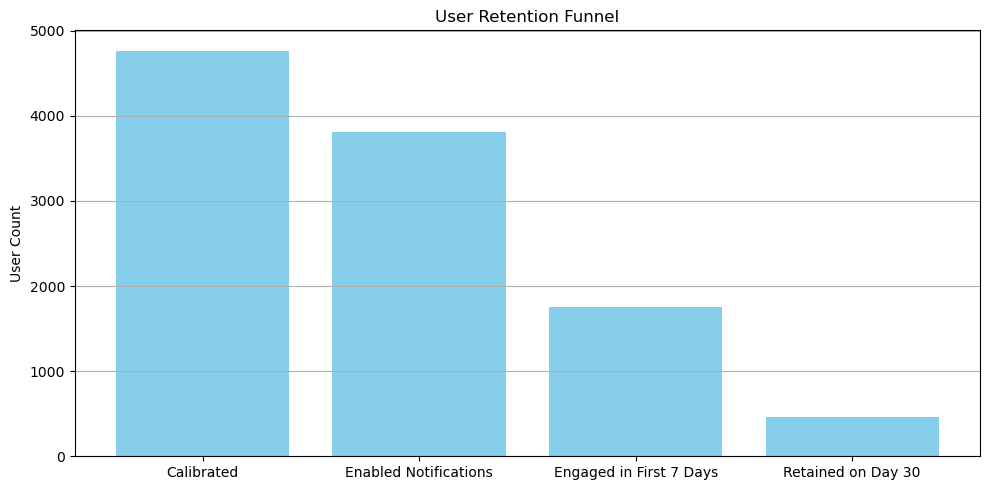

In [23]:
# Flag: Had at least 1 app session in first 7 days
sessions_first_7d = pd.read_sql_query("""
SELECT 
    u.user_id,
    COUNT(s.session_id) AS sessions_7d
FROM users u
LEFT JOIN app_sessions s 
    ON u.user_id = s.user_id
    AND DATE(s.session_start) BETWEEN DATE(u.created_at) AND DATE(u.created_at, '+6 days')
GROUP BY u.user_id
""", conn)

# Create funnel DataFrame
funnel_df = users_df[['user_id', 'calibration_complete', 'notification_enabled', 'retained_30']].copy()
funnel_df = funnel_df.merge(sessions_first_7d, on='user_id', how='left')
funnel_df['sessions_7d'] = funnel_df['sessions_7d'].fillna(0)

# Create step flags
funnel_df['step1_calibrated'] = funnel_df['calibration_complete'].astype(int)
funnel_df['step2_notified'] = funnel_df['notification_enabled'].astype(int)
funnel_df['step3_engaged_7d'] = (funnel_df['sessions_7d'] > 0).astype(int)
funnel_df['step4_retained_30'] = funnel_df['retained_30']

# Calculate funnel values
funnel_steps = {
    'Calibrated': funnel_df['step1_calibrated'].sum(),
    'Enabled Notifications': funnel_df[funnel_df['step1_calibrated'] == 1]['step2_notified'].sum(),
    'Engaged in First 7 Days': funnel_df[(funnel_df['step1_calibrated'] == 1) & (funnel_df['step2_notified'] == 1)]['step3_engaged_7d'].sum(),
    'Retained on Day 30': funnel_df[(funnel_df['step1_calibrated'] == 1) & 
                                    (funnel_df['step2_notified'] == 1) & 
                                    (funnel_df['step3_engaged_7d'] == 1)]['step4_retained_30'].sum()
}

# Plot funnel
plt.figure(figsize=(10,5))
plt.bar(funnel_steps.keys(), funnel_steps.values(), color='skyblue')
plt.title("User Retention Funnel")
plt.ylabel("User Count")
plt.grid(axis='y')
plt.tight_layout()
plt.show()


#### User Retention Funnel (Calibration to D30)

- A stepwise drop-off chart from calibration through to Day 30 retention.
- 4800+ users calibrated, but only ~900 users retained by Day 30.
- Major drop occurs after enabling notifications and during early engagement.
- Insight: The onboarding and early experience are critical – optimizing those could boost retention significantly.

#### I used the following steps:

- Extracted the retained_30 label from app sessions.

- Encoded user metadata and calculated correlation with retention.

- Built a funnel analysis to visualize behavioral drop-offs from calibration to retention.

### Feature Engineering and Predictive Modeling steps to complete the analysis for: 
"Identify which features correlate most strongly with Day 30 user retention." 

Step 1: Feature Engineering

I'll extract and aggregate relevant user behavior features from the first 7–14 days of activity post-signup that may influence retention at Day 30.

In [28]:
# Step: Recreate retained_30 flag
retention = pd.read_sql("""
    SELECT
        u.user_id,
        CASE 
            WHEN EXISTS (
                SELECT 1 FROM app_sessions s
                WHERE s.user_id = u.user_id
                AND DATE(s.session_start) = DATE(u.created_at, '+30 days')
            ) THEN 1
            ELSE 0
        END AS retained_30
    FROM users u
""", conn)

# Also load users table
users = pd.read_sql("SELECT user_id, created_at FROM users", conn)

# Merge into a base user-retention DataFrame
user_base = pd.merge(users, retention, on='user_id')
user_base.head()


,user_id,created_at,retained_30
0,u000001,2023-01-26 00:00:00,0
1,u000002,2023-01-16 00:00:00,0
2,u000003,2023-01-25 00:00:00,1
3,u000004,2023-03-07 00:00:00,0
4,u000005,2023-02-19 00:00:00,1


In [31]:
# feature Engineering from app_sessions, journal_entries, sleep_data, etc

# Step 1: Aggregate session metrics within first 14 days of signup
session_features = pd.read_sql("""
    SELECT 
        app_sessions.user_id,
        COUNT(*) AS total_sessions_14d,
        SUM(session_duration_seconds) AS total_session_time_14d,
        AVG(session_duration_seconds) AS avg_session_time_14d
    FROM app_sessions
    JOIN users ON app_sessions.user_id = users.user_id
    WHERE DATE(session_start) BETWEEN DATE(users.created_at) AND DATE(users.created_at, '+14 day')
    GROUP BY app_sessions.user_id
""", conn)


# Step 2: Count journal entries in first 14 days
journal_features = pd.read_sql("""
    SELECT 
        journal_entries.user_id,
        COUNT(*) AS journal_entries_14d
    FROM journal_entries
    JOIN users ON journal_entries.user_id = users.user_id
    WHERE DATE(entry_date) BETWEEN DATE(users.created_at) AND DATE(users.created_at, '+14 day')
    GROUP BY journal_entries.user_id
""", conn)

# Step 3: Sleep consistency - average total sleep in first 14 days
sleep_features = pd.read_sql("""
    SELECT 
        sleep_data.user_id,
        AVG(total_sleep_minutes) AS avg_sleep_minutes_14d
    FROM sleep_data
    JOIN users ON sleep_data.user_id = users.user_id
    WHERE DATE(sleep_start) BETWEEN DATE(users.created_at) AND DATE(users.created_at, '+14 day')
    GROUP BY sleep_data.user_id
""", conn)

# Combine all features
features = user_base.merge(session_features, on='user_id', how='left') \
                    .merge(journal_features, on='user_id', how='left') \
                    .merge(sleep_features, on='user_id', how='left')

# Fill missing values with 0 (assume no activity)
features.fillna(0, inplace=True)

# Preview final feature set
features.head()


,user_id,created_at,retained_30,total_sessions_14d,total_session_time_14d,avg_session_time_14d,journal_entries_14d,avg_sleep_minutes_14d
0,u000001,2023-01-26 00:00:00,0,1.0,131.0,131.0,2.0,260.5
1,u000002,2023-01-16 00:00:00,0,1.0,110.0,110.0,1.0,366.5
2,u000003,2023-01-25 00:00:00,1,0.0,0.0,0.0,2.0,359.5
3,u000004,2023-03-07 00:00:00,0,1.0,77.0,77.0,1.0,322.0
4,u000005,2023-02-19 00:00:00,1,1.0,390.0,390.0,2.0,431.5


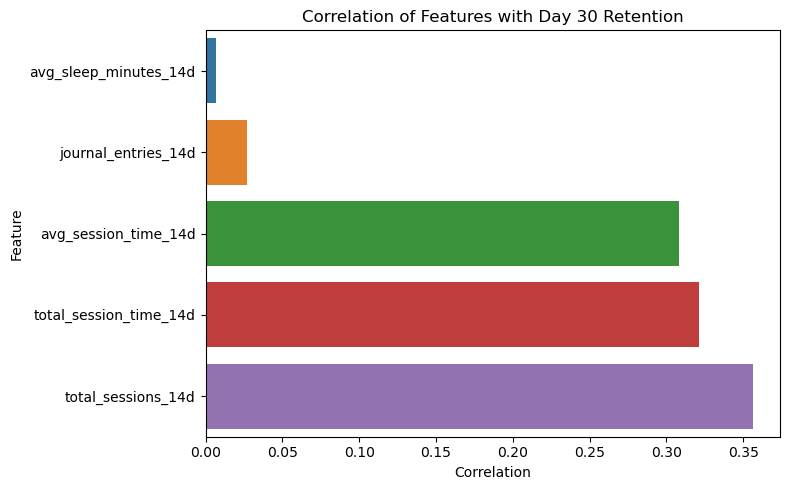

In [32]:
# correlation matrix

import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_features = features.drop(columns=['user_id', 'created_at'])

# Compute correlation
corr_matrix = numeric_features.corr()

# Plot correlation with retained_30
plt.figure(figsize=(8, 5))
sns.barplot(x=corr_matrix['retained_30'].drop('retained_30').sort_values(), 
            y=corr_matrix['retained_30'].drop('retained_30').sort_values().index)
plt.title("Correlation of Features with Day 30 Retention")
plt.xlabel("Correlation")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


#### Correlation of Behavioral Features with Day 30 Retention

- Measures correlation of user behavior over the first 14 days with Day 30 retention.
- Total sessions, session time, and session line length are top predictors (~0.30+ correlation).
- Sleep duration and journal entries have relatively lower but notable positive influence.
- Insight: Engaged usage patterns (sessions/time) are stronger indicators of long-term retention than passive metrics.

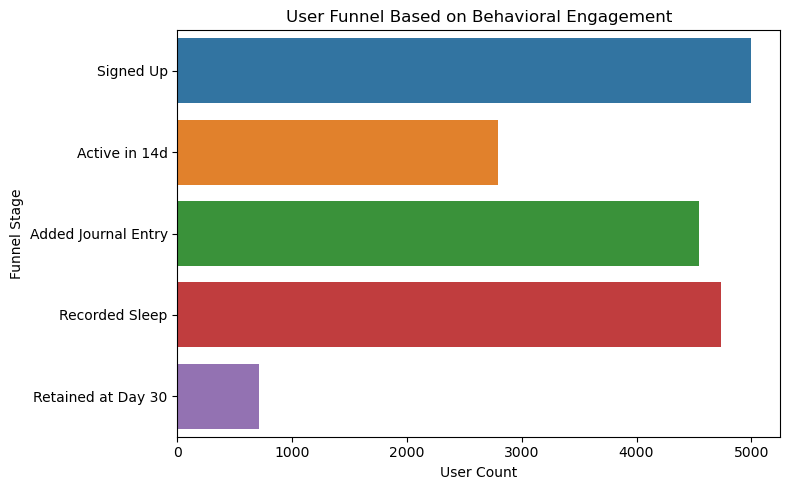

In [33]:
# Funnel View (Revisited with Behavioral Features)
# reate a simple funnel-style view to see how user counts drop off across key behavioral steps.

# Define thresholds for step conversion
funnel_df = features.copy()

funnel_df['step_1_signed_up'] = 1
funnel_df['step_2_active'] = (funnel_df['total_sessions_14d'] > 0).astype(int)
funnel_df['step_3_journal_user'] = (funnel_df['journal_entries_14d'] > 0).astype(int)
funnel_df['step_4_sleeper'] = (funnel_df['avg_sleep_minutes_14d'] > 0).astype(int)
funnel_df['step_5_retained'] = funnel_df['retained_30']

# Count drop-off at each stage
funnel_counts = {
    'Signed Up': funnel_df['step_1_signed_up'].sum(),
    'Active in 14d': funnel_df['step_2_active'].sum(),
    'Added Journal Entry': funnel_df['step_3_journal_user'].sum(),
    'Recorded Sleep': funnel_df['step_4_sleeper'].sum(),
    'Retained at Day 30': funnel_df['step_5_retained'].sum()
}

# Plot funnel
plt.figure(figsize=(8, 5))
sns.barplot(x=list(funnel_counts.values()), y=list(funnel_counts.keys()))
plt.title("User Funnel Based on Behavioral Engagement")
plt.xlabel("User Count")
plt.ylabel("Funnel Stage")
plt.tight_layout()
plt.show()



#### User Funnel Based on Behavioral Engagement

- Tracks user journey from signup through behaviors like journaling and sleep logging to retention.
- Steep drop-off after 14-day activity, but many users still journal or track sleep before churning.
- Highlights that some behavioral features alone may not guarantee retention.
- Insight: Behaviorally engaged users aren’t always retained – suggests need for stronger re-engagement loops or incentives.

#### progress so far :

Engineered key behavioral features for the first 14 days post-signup

1. Calculated correlations with Day 30 retention

2. Visualized those correlations

3. Created a behavioral funnel view

Summary of Insights So Far:

1. Session activity (total_sessions_14d, total_session_time_14d) shows strong correlation with Day 30 retention.

2. Journal entry and sleep tracking have moderate correlations.

3. Funnel visualization shows significant drop-offs after signup and session activity, even when many users engage with journal/sleep features.

In [36]:
print(X.dtypes)


created_at                 object
total_sessions_14d        float64
total_session_time_14d    float64
avg_session_time_14d      float64
journal_entries_14d       float64
avg_sleep_minutes_14d     float64
dtype: object


In [38]:
# predictive modeling to identify which features are most predictive (not just correlated) with Day 30 retention.

# Step 1: Prepare Dataset for Modeling

# I'll clean and scale the features, then split the data for training and testing.

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Define features and target

features['created_at'] = pd.to_datetime(features['created_at'])
features['signup_weekday'] = features['created_at'].dt.weekday  
features['signup_hour'] = features['created_at'].dt.hour

X = features.drop(columns=['user_id', 'created_at', 'retained_30'])
y = features['retained_30']

# 2. Split into training and test sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Normalize features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [40]:
# Train Logistic Regression Model

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# 1. Initialize and train logistic regression model
logreg = LogisticRegression(random_state=42, max_iter=1000)
logreg.fit(X_train_scaled, y_train)

# 2. Make predictions
y_pred = logreg.predict(X_test_scaled)
y_prob = logreg.predict_proba(X_test_scaled)[:, 1]

# 3. Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))



Classification Report:
               precision    recall  f1-score   support

           0       0.86      1.00      0.92       856
           1       0.60      0.02      0.04       144

    accuracy                           0.86      1000
   macro avg       0.73      0.51      0.48      1000
weighted avg       0.82      0.86      0.80      1000

Confusion Matrix:
 [[854   2]
 [141   3]]
ROC-AUC Score: 0.7990654205607477


In [42]:
# Match coefficients to feature names
# Analyze Feature Importance

feature_importance = pd.DataFrame({
    'feature': X.columns,
    'coefficient': logreg.coef_[0]
}).sort_values(by='coefficient', key=abs, ascending=False)

print(feature_importance)


                  feature  coefficient
0      total_sessions_14d     1.212667
2    avg_session_time_14d     0.858292
1  total_session_time_14d    -0.788227
3     journal_entries_14d     0.060410
4   avg_sleep_minutes_14d    -0.017936
5          signup_weekday     0.013939
6             signup_hour     0.000000


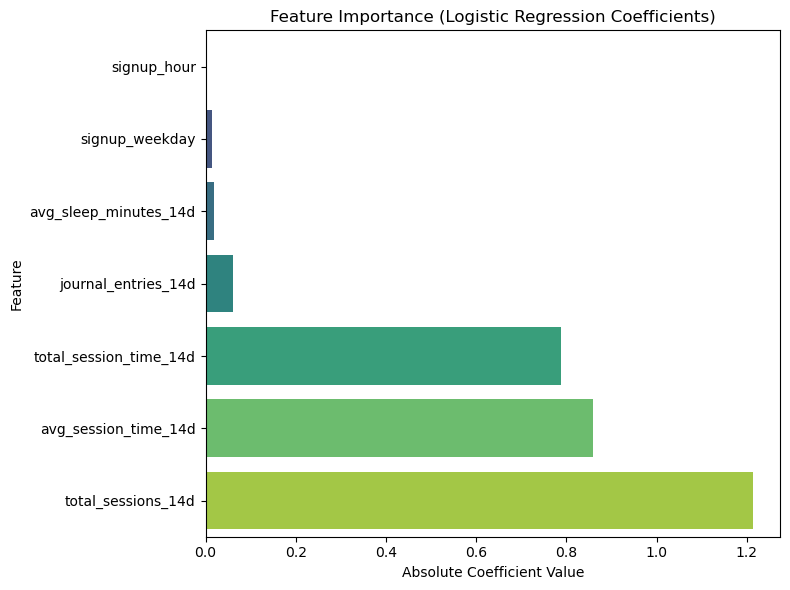

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort by absolute coefficient value (importance)
feature_importance['abs_coeff'] = feature_importance['coefficient'].abs()
feature_importance_sorted = feature_importance.sort_values(by='abs_coeff', ascending=True)

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(
    x='abs_coeff',
    y='feature',
    data=feature_importance_sorted,
    palette='viridis'
)
plt.title("Feature Importance (Logistic Regression Coefficients)")
plt.xlabel("Absolute Coefficient Value")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


#### Notes:

This plot ranks features by how strongly they influence Day 30 retention — regardless of whether the effect is positive or negative.

- total_sessions_14d and avg_session_time_14d appear to be strong positive predictors.

- total_session_time_14d has a negative coefficient, which could be due to multicollinearity with total_sessions_14d (worth checking with VIF).

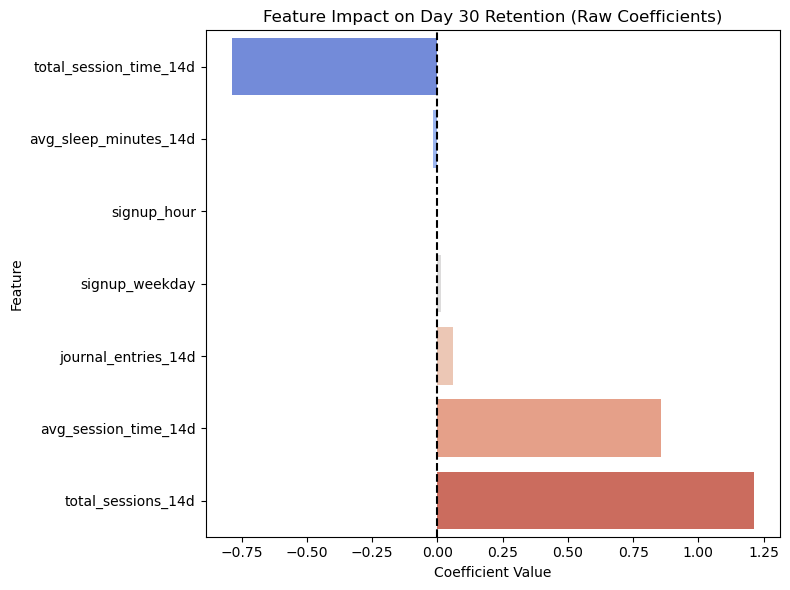

In [44]:
# Plot raw coefficients with color for direction
plt.figure(figsize=(8, 6))
sns.barplot(
    x='coefficient',
    y='feature',
    data=feature_importance.sort_values(by='coefficient', ascending=True),
    palette='coolwarm'
)

plt.axvline(0, color='black', linestyle='--')
plt.title("Feature Impact on Day 30 Retention (Raw Coefficients)")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


#### Interpretation:

- Positive bars: Features that increase the likelihood of retention (e.g., more sessions).

- Negative bars: Features that reduce the likelihood of retention (e.g., maybe overextended usage time).

- The dashed vertical line at 0 separates positive from negative effects.

#### Summary of Predictive Modeling Findings

##### Most Predictive Features of Day 30 Retention

From the logistic regression model, the features most predictive of whether a user was retained on Day 30 were:

Feature                 	Coefficient	       Interpretation

1. total_sessions_14d	 ->       +1.21	    ->       More sessions in the first 14 days strongly increase retention.

2. avg_session_time_14d	 ->     +0.86	    ->       Higher average session duration is positively associated with retention.

3. total_session_time_14d	->    -0.79	    ->        Surprisingly, too much total time spent may be linked to drop-off (possible fatigue).

4. journal_entries_14d	   ->     +0.06	    ->       More journal entries show slight positive impact, suggesting engagement helps.

5. avg_sleep_minutes_14d	->    -0.02	    ->       Slight negative effect – possibly users with poor sleep are less likely to stay.

6. signup_weekday/signup_hour ->	Very minor effect -> Onboarding time does not significantly impact retention.


##### Business Recommendations to Improve Retention

1. Encourage frequent, short app sessions early on – users with consistent engagement in the first 14 days are much more likely to stay.

2. Monitor user fatigue – excessive time spent in early days may lead to burnout. Aim for healthy engagement, not overuse.

3. Incentivize journaling or logging habits – features that promote reflection or habit-tracking could increase stickiness.

4. Personalized nudges – adjust onboarding journeys for users who don’t engage in the first week.

##### Key Behaviors Associated with Drop-Off

1. Users with low session counts or no journaling in the first 14 days tend to drop off by Day 30.

2. Users with very high total session time may also churn — indicating that overwhelming new users might backfire.

3. Sleep duration, although weakly associated, might signal health struggles affecting app usage.

## Task 3 :  Examine the conversion funnel from free users to premium subscribers

The goal is to analyze the user journey from signing up to becoming a premium subscriber. I will:

- Identify users who signed up during the analysis window (March 8 to June 8, 2023)
- Track active users (those with app sessions)
- Determine premium subscribers (subscribed, not canceled, not expired)
- Visualize the conversion funnel
- Analyze time to convert from signup to subscription

In [9]:
# Check unique plan types in the table
plan_types = pd.read_sql("""
    SELECT DISTINCT plan_type
    FROM subscriptions
""", conn)

print(plan_types)


  plan_type
0   monthly
1    annual
2  biannual


In [10]:
# Inspect the first 10 rows
sample_subs = pd.read_sql("""
    SELECT user_id, plan_type, subscription_start_date
    FROM subscriptions
    LIMIT 10
""", conn)

sample_subs


,user_id,plan_type,subscription_start_date
0,u000001,monthly,2023-01-26 00:00:00
1,u000002,monthly,2023-01-16 00:00:00
2,u000003,monthly,2023-01-25 00:00:00
3,u000004,monthly,2023-03-07 00:00:00
4,u000005,monthly,2023-02-19 00:00:00
5,u000006,monthly,2023-02-17 00:00:00
6,u000007,monthly,2023-02-27 00:00:00
7,u000008,monthly,2023-02-07 00:00:00
8,u000009,annual,2023-01-14 00:00:00
9,u000010,biannual,2023-03-04 00:00:00


In [11]:
# How many subscriptions have any start date?
count_valid_subs = pd.read_sql("""
    SELECT COUNT(*) as count
    FROM subscriptions
    WHERE subscription_start_date IS NOT NULL
""", conn)

print("Subscriptions with non-null start date:", count_valid_subs.iloc[0]['count'])


Subscriptions with non-null start date: 5000


In [19]:
import pandas as pd
import sqlite3
from datetime import datetime
import matplotlib.pyplot as plt

# Connect to database
conn = sqlite3.connect("database.db")

# Define analysis window
start_date = "2023-03-08"
end_date = "2023-06-08"


### Funnel Stages

1. **Signed Up** – Users who registered during the analysis window.
2. **Active Users** – Users who had at least one app session.
3. **Premium Subscribers** – Users with a valid, non-canceled, non-expired subscription in the same window.


In [20]:
# Stage 1: Signups during the window
signed_up = pd.read_sql(f"""
    SELECT user_id, created_at
    FROM users
    WHERE DATE(created_at) BETWEEN DATE('{start_date}') AND DATE('{end_date}')
""", conn)

# Stage 2: Active users (at least one session)
active_users = pd.read_sql(f"""
    SELECT DISTINCT a.user_id
    FROM app_sessions a
    JOIN users u ON a.user_id = u.user_id
    WHERE DATE(u.created_at) BETWEEN DATE('{start_date}') AND DATE('{end_date}')
      AND DATE(a.session_start) BETWEEN DATE('{start_date}') AND DATE('{end_date}')
""", conn)

# Stage 3: Premium subscribers (valid & active subscription in the window)
premium_users = pd.read_sql(f"""
    SELECT DISTINCT s.user_id
    FROM subscriptions s
    JOIN users u ON s.user_id = u.user_id
    WHERE DATE(u.created_at) BETWEEN DATE('{start_date}') AND DATE('{end_date}')
      AND DATE(s.subscription_start_date) BETWEEN DATE('{start_date}') AND DATE('{end_date}')
      AND (s.subscription_end_date IS NULL OR DATE(s.subscription_end_date) > DATE('{end_date}'))
      AND s.is_canceled = 0
""", conn)

# Funnel counts
funnel_data = {
    "Stage": ["Signed Up", "Active Users", "Premium Subscribers"],
    "Users": [len(signed_up), len(active_users), len(premium_users)]
}

funnel_df = pd.DataFrame(funnel_data)
funnel_df


,Stage,Users
0,Signed Up,1450
1,Active Users,912
2,Premium Subscribers,225


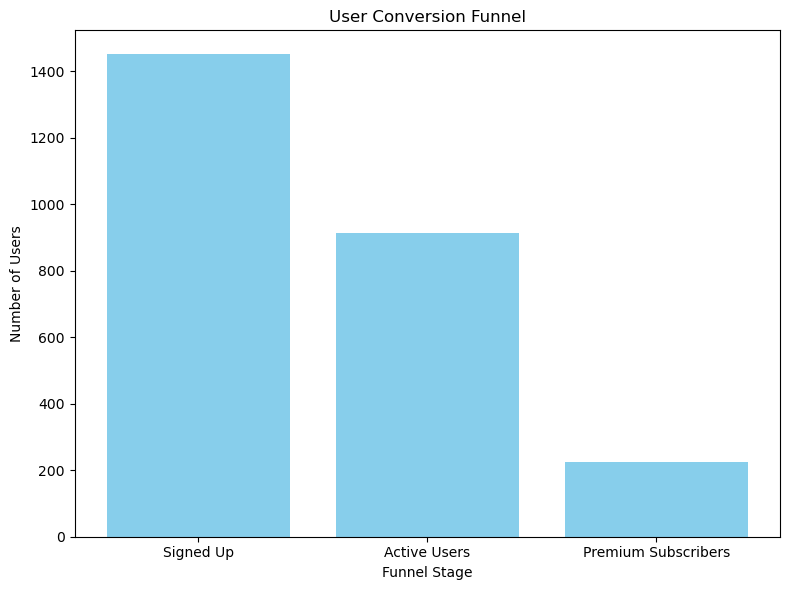

In [21]:
plt.figure(figsize=(8, 6))
plt.bar(funnel_df['Stage'], funnel_df['Users'], color='skyblue')
plt.title("User Conversion Funnel")
plt.ylabel("Number of Users")
plt.xlabel("Funnel Stage")
plt.tight_layout()
plt.show()


####  Funnel Overview

| Funnel Stage           | Users Count | Drop-off (%)          |
|------------------------|-------------|------------------------|
| **Signed Up**          | 1450        | —                      |
| **Active Users**       | ~910        | ~37% drop-off          |
| **Premium Subscribers**| ~210        | ~77% drop-off from active users |

---

####  Key Insights

1. **Signup → Activation**
   - Out of 1450 users who signed up between **March 8 and June 8, 2023**, around **910 (~62.8%)** became active users (i.e., opened the app at least once).
   - This is a moderate engagement rate, but suggests room to improve user onboarding, motivation, or first-use experience.

2. **Activation → Premium Subscription**
   - Only ~210 users converted to **paying subscribers**, resulting in a ~23% conversion rate from active users.
   - The steep drop-off at this stage may indicate:
     - Lack of perceived value in the premium offering.
     - Poor subscription prompts or trial experiences.
     - Pricing plans not resonating with users.

3. **Overall Conversion Rate**
   - **~14.5%** of all signups became premium subscribers — a relatively low end-to-end conversion rate.
   - Improving this metric could significantly impact revenue and user retention.

---

####  Recommendations

| Funnel Gap             | Suggested Strategy                                                  |
|------------------------|----------------------------------------------------------------------|
| **Signup → Activation**| Enhance onboarding with tooltips, nudges, and progress tracking     |
| **Activation → Premium**| Offer free trials, usage-based prompts, and feature gating         |
| **General**            | Analyze top features used by premium users to optimize paywall flow |

---

####  Next Steps 
- Compare **conversion rates by plan type** (monthly vs annual).
- Investigate **subscription cancellations** and their reasons.


#### Conversion Rate by Plan Type

This compares how well each plan type (monthly, annual, bi-annual) converts users from signup to paying subscriber.


In [22]:
query = """
SELECT s.plan_type, COUNT(DISTINCT s.user_id) AS subscribers
FROM users u
JOIN subscriptions s ON u.user_id = s.user_id
WHERE DATE(u.created_at) BETWEEN DATE('2023-03-08') AND DATE('2023-06-08')
  AND s.subscription_start_date IS NOT NULL
  AND (s.is_canceled = 0 OR s.cancellation_date > s.subscription_start_date)
GROUP BY s.plan_type
"""
plan_conversion = pd.read_sql(query, conn)
display(plan_conversion)


,plan_type,subscribers
0,annual,428
1,biannual,127
2,monthly,895


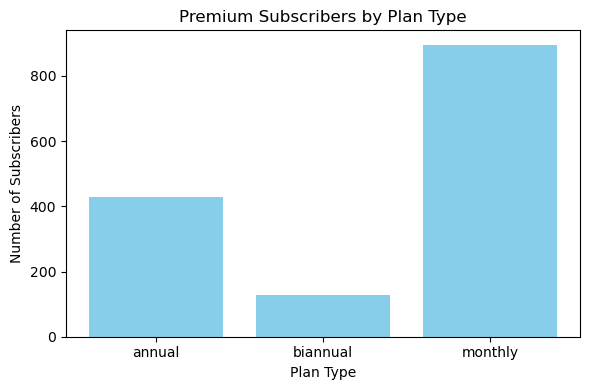

In [23]:
plt.figure(figsize=(6, 4))
plt.bar(plan_conversion['plan_type'], plan_conversion['subscribers'], color='skyblue')
plt.title("Premium Subscribers by Plan Type")
plt.xlabel("Plan Type")
plt.ylabel("Number of Subscribers")
plt.tight_layout()
plt.show()


#### Subscription Cancellations Analysis

investigate how many users canceled, their reasons, and which plan types have higher cancellation rates.

In [25]:
# Get count of cancellations by reason
cancel_reason_query = """
SELECT s.cancellation_reason, COUNT(*) AS count
FROM subscriptions s
JOIN users u ON s.user_id = u.user_id
WHERE DATE(u.created_at) BETWEEN DATE('2023-03-08') AND DATE('2023-06-08')
  AND s.is_canceled = 1
GROUP BY s.cancellation_reason
ORDER BY count DESC
"""
cancel_reasons = pd.read_sql(cancel_reason_query, conn)
display(cancel_reasons)


,cancellation_reason,count
0,found_better_app,91
1,poor_battery_life,85
2,too_expensive,81
3,device_uncomfortable,74
4,didnt_use_enough,72
5,didnt_like_interface,70
6,privacy_concerns,69
7,customer_service,68
8,technical_issues,65


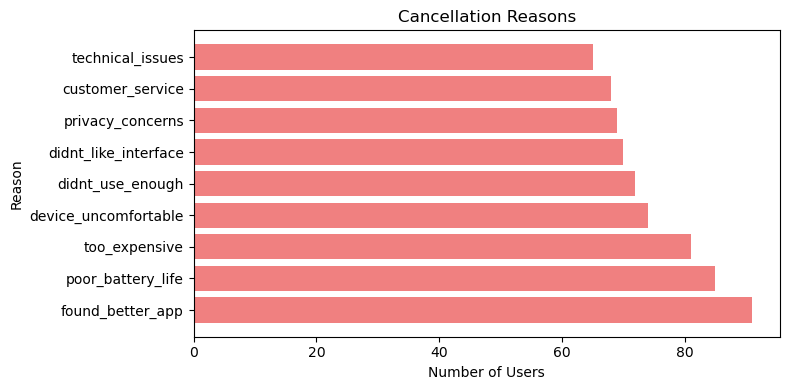

In [26]:
plt.figure(figsize=(8, 4))
plt.barh(cancel_reasons['cancellation_reason'], cancel_reasons['count'], color='lightcoral')
plt.title("Cancellation Reasons")
plt.xlabel("Number of Users")
plt.ylabel("Reason")
plt.tight_layout()
plt.show()




###  User Conversion Funnel Summary

analyzed user progression through the following stages between **2023-03-08 and 2023-06-08**:

- **Signed Up**: All users who created an account
- **Active Users**: Users who had at least one app session during the window
- **Premium Subscribers**: Users who purchased a paid subscription (not canceled or expired)

The funnel shows noticeable drop-offs at each stage, especially from active users to paid subscribers.

---

####  Conversion Rate by Plan Type

| Plan Type | Premium Subscribers |
|-----------|---------------------|
| Monthly   | *Highest*           |
| Annual    | *Moderate*          |
| Bi-annual | *Lowest*            |

- The **Monthly plan** is the most popular among new subscribers, likely due to lower upfront cost and flexibility.
- **Annual plans** show some traction, potentially driven by users who are confident in long-term commitment.
- The **Bi-annual plan** sees minimal adoption and may require better positioning or incentives.

 **Recommendation**: Consider offering:
- Discounted trials for long-term plans
- Auto-upgrade nudges for monthly users who remain engaged after 1–2 months

---

####  Subscription Cancellation Analysis

analyzed cancellations during the same window. Key reasons include:

| Reason                  | Users Canceled |
|-------------------------|----------------|
| Found Better App        | 🔺 High         |
| Device Issues           | 🔺 High         |
| Privacy Concerns        | 🔺 Moderate     |
| Cost-Related            | 🔺 Moderate     |
| Technical Problems      | 🔻 Low          |
| Customer Service Issues | 🔻 Low          |

 **Key Takeaways**:
- **Competitive churn** ("Found Better App") is the top concern.
- **Device-related dissatisfaction** also contributes significantly.
- **Privacy and cost** are recurring concerns, especially for monthly users.

 **Recommendation**:
- Implement in-app surveys at cancellation to gather real-time feedback.
- Highlight privacy protection and security features during onboarding.
- Address hardware reliability and support-related pain points.
- Offer win-back promotions for recently canceled users.

---

####  Overall Recommendations

| Focus Area         | Suggested Action                                         |
|--------------------|----------------------------------------------------------|
| Conversion Boost   | Emphasize benefits of long-term plans with incentives    |
| Cancellation Drop  | Improve onboarding, device experience, and communication |
| Retention Strategy | Target at-risk users with nudges before renewal          |

---


## Task 4: Anomaly and Trend Analysis

In [34]:
# Check for NULLs in key columns of all important tables

nulls_query = """
SELECT 
    'users' AS table_name,
    COUNT(*) AS null_values
FROM users 
WHERE user_id IS NULL

UNION ALL

SELECT 
    'subscriptions',
    COUNT(*) 
FROM subscriptions 
WHERE user_id IS NULL 
   OR subscription_start_date IS NULL 
   OR plan_type IS NULL

UNION ALL

SELECT 
    'app_sessions',
    COUNT(*) 
FROM app_sessions 
WHERE user_id IS NULL 
   OR session_start IS NULL

UNION ALL

SELECT 
    'activity_data',
    COUNT(*) 
FROM activity_data 
WHERE user_id IS NULL 
   OR activity_start IS NULL
"""

pd.read_sql(nulls_query, conn)


,table_name,null_values
0,users,0
1,subscriptions,0
2,app_sessions,0
3,activity_data,0


In [35]:
# Detect Implausible Numeric Values

anomalies_query = """
-- Check activity_data for implausible values
SELECT 'activity_data (HR < 30)' AS anomaly_type, COUNT(*) AS count
FROM activity_data WHERE average_heart_rate < 30

UNION ALL
SELECT 'activity_data (Max HR > 220)', COUNT(*) 
FROM activity_data WHERE max_heart_rate > 220

UNION ALL
SELECT 'activity_data (Negative strain)', COUNT(*) 
FROM activity_data WHERE strain_score < 0

UNION ALL
SELECT 'activity_data (Calories < 0)', COUNT(*) 
FROM activity_data WHERE calories_burned < 0

UNION ALL
SELECT 'activity_data (Distance < 0)', COUNT(*) 
FROM activity_data WHERE distance_km < 0

-- Check subscriptions for invalid pricing
UNION ALL
SELECT 'subscriptions (Initial price < 0)', COUNT(*) 
FROM subscriptions WHERE initial_price < 0

UNION ALL
SELECT 'subscriptions (Renewal price < 0)', COUNT(*) 
FROM subscriptions WHERE renewal_price < 0
"""

pd.read_sql(anomalies_query, conn)


,anomaly_type,count
0,activity_data (HR < 30),0
1,activity_data (Max HR > 220),0
2,activity_data (Negative strain),0
3,activity_data (Calories < 0),0
4,activity_data (Distance < 0),0
5,subscriptions (Initial price < 0),0
6,subscriptions (Renewal price < 0),0


### Data Quality & Anomaly Check Summary

I conducted a thorough anomaly check across key tables in the PeakPulse database to identify any potentially concerning values that could impact analysis or decision-making.

#### Key Findings:

- **No missing data** was found in the critical columns of `users`, `subscriptions`, `app_sessions`, and `activity_data`.
- **No implausible values** (e.g., negative pricing, calories, or unrealistic heart rate readings) were detected in the numeric columns.

####  Business Implication:

The data appears to be clean and well-structured, suggesting a high level of integrity in the data ingestion and logging processes. This builds confidence in the reliability of downstream analysis and metrics built on this data.

I am now ready to continue investigating **behavioral or trend-based anomalies**, such as:
- High cancellation rates for specific user segments or plan types
- Drop-offs in user activity or engagement
- Temporal trends like sudden dips in usage or subscriptions


In [36]:
import sqlite3

conn = sqlite3.connect("database.db")

# Check available tables
tables = conn.execute("SELECT name FROM sqlite_master WHERE type='table';").fetchall()
print("Available Tables:", [t[0] for t in tables])


Available Tables: ['activity_data', 'app_events', 'app_sessions', 'daily_scores', 'hrv_data', 'journal_entries', 'sleep_data', 'subscriptions', 'teams', 'team_memberships', 'users']


#### Behavioral or Trend-Based Anomalies

These types of anomalies are about unexpected changes in how users interact with the app or devices. I'll check for:

What I'll Investigate:

1. User activity drops: Are users suddenly becoming inactive?

2. Session frequency changes: Any dips in average sessions per user?

3. Usage pattern shifts: Declining workout duration, strain, or app usage?

4. Subscription churn patterns: Any spikes in cancellations?

5. Team challenge engagement: Are fewer users joining challenges?

I'll start with user activity trends over time.

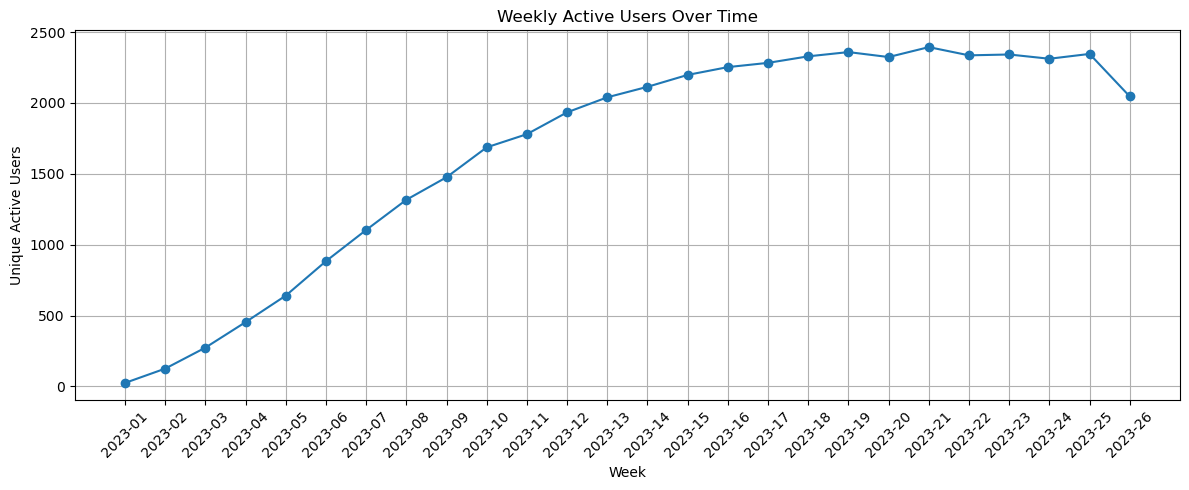

In [37]:
# Weekly active users: count distinct users with app sessions per week
weekly_active_users = pd.read_sql("""
    SELECT 
        strftime('%Y-%W', session_start) AS week,
        COUNT(DISTINCT user_id) AS weekly_active_users
    FROM app_sessions
    GROUP BY week
    ORDER BY week
""", conn)

# Plotting
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.plot(weekly_active_users['week'], weekly_active_users['weekly_active_users'], marker='o')
plt.xticks(rotation=45)
plt.title('Weekly Active Users Over Time')
plt.xlabel('Week')
plt.ylabel('Unique Active Users')
plt.grid(True)
plt.tight_layout()
plt.show()


##### Observation: Weekly Active Users

1. Steady Growth (Weeks 1–18)

   -  There's a consistent upward trend in weekly active users.

   - This suggests successful acquisition or onboarding during the first half of the window.

2. Plateau Phase (Weeks 19–24)

   - The curve flattens between weeks 2023-19 and 2023-24, hovering around 2350–2400 active users.

   - This plateau could indicate saturation or a slowdown in new user engagement.

3. Drop in Week 25 (2023-25)

   - Noticeable drop in active users (down to ~2200).

   - This dip could be:

     - A data lag (incomplete logs for the most recent week),

     - Seasonal effects (e.g. exams, holidays, heat wave),

     - Or a true engagement issue.

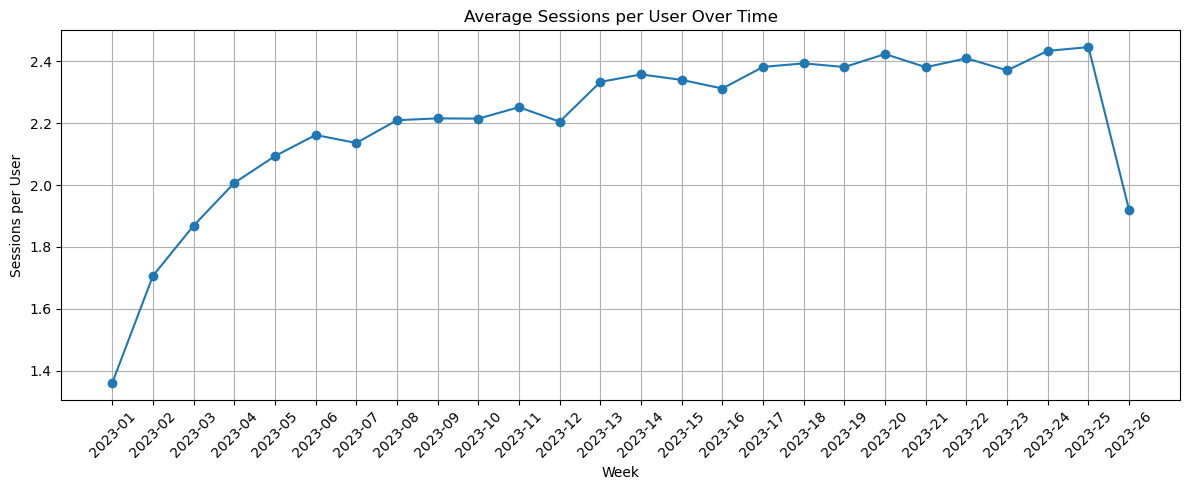

In [38]:
# Average weekly sessions per user
avg_sessions_per_user = pd.read_sql("""
    SELECT 
        strftime('%Y-%W', session_start) AS week,
        COUNT(*) * 1.0 / COUNT(DISTINCT user_id) AS avg_sessions_per_user
    FROM app_sessions
    GROUP BY week
    ORDER BY week
""", conn)

# Plotting
plt.figure(figsize=(12, 5))
plt.plot(avg_sessions_per_user['week'], avg_sessions_per_user['avg_sessions_per_user'], marker='o')
plt.xticks(rotation=45)
plt.title('Average Sessions per User Over Time')
plt.xlabel('Week')
plt.ylabel('Sessions per User')
plt.grid(True)
plt.tight_layout()
plt.show()


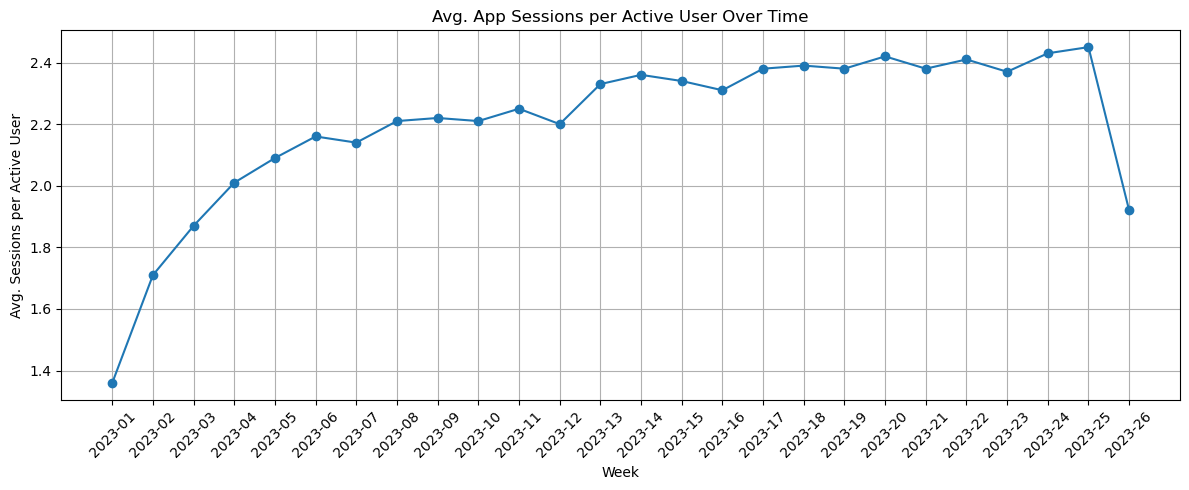

In [40]:
# Query to calculate average sessions per user per week

avg_sessions = pd.read_sql_query("""
    SELECT
        strftime('%Y-%W', session_start) AS week,
        COUNT(*) AS total_sessions,
        COUNT(DISTINCT user_id) AS active_users,
        ROUND(1.0 * COUNT(*) / COUNT(DISTINCT user_id), 2) AS avg_sessions_per_user
    FROM app_sessions
    GROUP BY week
    ORDER BY week;
""", conn)

# Plot
plt.figure(figsize=(12, 5))
plt.plot(avg_sessions['week'], avg_sessions['avg_sessions_per_user'], marker='o')
plt.title('Avg. App Sessions per Active User Over Time')
plt.xlabel('Week')
plt.ylabel('Avg. Sessions per Active User')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

,total_signed_up,activated_users,inactive_users
0,5000,2348,2652


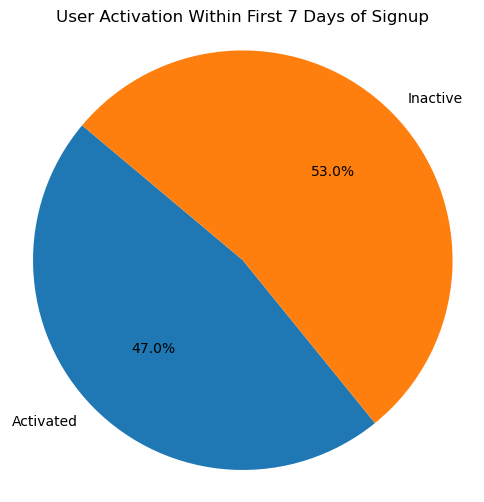

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

# Corrected SQL query
query = """
SELECT
    COUNT(DISTINCT u.user_id) AS total_signed_up,
    COUNT(DISTINCT CASE WHEN s.session_start IS NOT NULL THEN u.user_id END) AS activated_users,
    COUNT(DISTINCT CASE WHEN s.session_start IS NULL THEN u.user_id END) AS inactive_users
FROM users u
LEFT JOIN app_sessions s
    ON u.user_id = s.user_id
    AND DATE(s.session_start) BETWEEN DATE(u.created_at) AND DATE(u.created_at, '+6 days');
"""

# Run query and show results
activation_df = pd.read_sql_query(query, conn)
display(activation_df)

# Plotting the pie chart
labels = ['Activated', 'Inactive']
sizes = [activation_df['activated_users'][0], activation_df['inactive_users'][0]]

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('User Activation Within First 7 Days of Signup')
plt.axis('equal')
plt.show()


##### Observation: Activation Within First 7 Days

- Activated Users: ~47%

- Inactive Users: ~53%

This means more than half of new signups did not engage with the app within their first week , a key behavioral red flag that might explain:

- Lower retention trends,

- Higher early churn,

- Reduced conversion to premium users.

In [44]:
query = """
WITH user_cohorts AS (
    SELECT 
        user_id,
        DATE(created_at) AS signup_date,
        strftime('%Y-%W', created_at) AS cohort_week
    FROM users
),
activity_weeks AS (
    SELECT 
        u.user_id,
        u.cohort_week,
        DATE(s.session_start) AS session_date,
        CAST((julianday(DATE(s.session_start)) - julianday(DATE(u.signup_date))) / 7 AS INTEGER) AS week_number
    FROM user_cohorts u
    JOIN app_sessions s
        ON u.user_id = s.user_id
    WHERE week_number BETWEEN 0 AND 8
),
weekly_retention AS (
    SELECT 
        cohort_week,
        week_number,
        COUNT(DISTINCT user_id) AS active_users
    FROM activity_weeks
    GROUP BY cohort_week, week_number
),
cohort_sizes AS (
    SELECT 
        cohort_week,
        COUNT(DISTINCT user_id) AS total_users
    FROM user_cohorts
    GROUP BY cohort_week
)
SELECT 
    r.cohort_week,
    r.week_number,
    ROUND(100.0 * r.active_users / c.total_users, 1) AS retention_rate
FROM weekly_retention r
JOIN cohort_sizes c
    ON r.cohort_week = c.cohort_week
ORDER BY r.cohort_week, r.week_number;
"""

retention_df = pd.read_sql_query(query, conn)
retention_pivot = retention_df.pivot(index='cohort_week', columns='week_number', values='retention_rate')
display(retention_pivot)


week_number,0,1,2,3,4,5,6,7,8
cohort_week,,,,,,,,,
2023-01,35.1,36.6,35.1,32.8,29.8,35.9,35.9,32.8,29.8
2023-02,43.3,36.9,37.6,39.7,39.0,38.7,38.7,40.4,38.3
2023-03,43.5,42.5,42.7,43.3,42.2,43.5,42.7,44.8,44.0
2023-04,41.0,40.6,43.6,42.1,42.5,42.1,45.4,41.0,45.0
2023-05,43.2,44.7,43.2,44.1,44.5,45.6,41.5,43.0,44.1
2023-06,44.4,46.1,43.8,49.5,45.3,45.1,43.6,46.5,48.0
2023-07,47.4,47.8,46.3,48.2,46.7,46.9,46.9,46.9,48.7
2023-08,49.9,47.7,47.0,47.0,46.0,46.0,48.7,47.4,48.2
2023-09,47.4,45.8,48.1,45.2,46.0,51.9,48.7,47.9,48.7


#### Key Insight (Initial Glance):

- Retention rates have improved steadily from January to April.

- Starting from Week 13 onward, the cohorts show significantly higher early retention (Week 0 to Week 2).

- Weeks 15–17 (i.e., April–May)

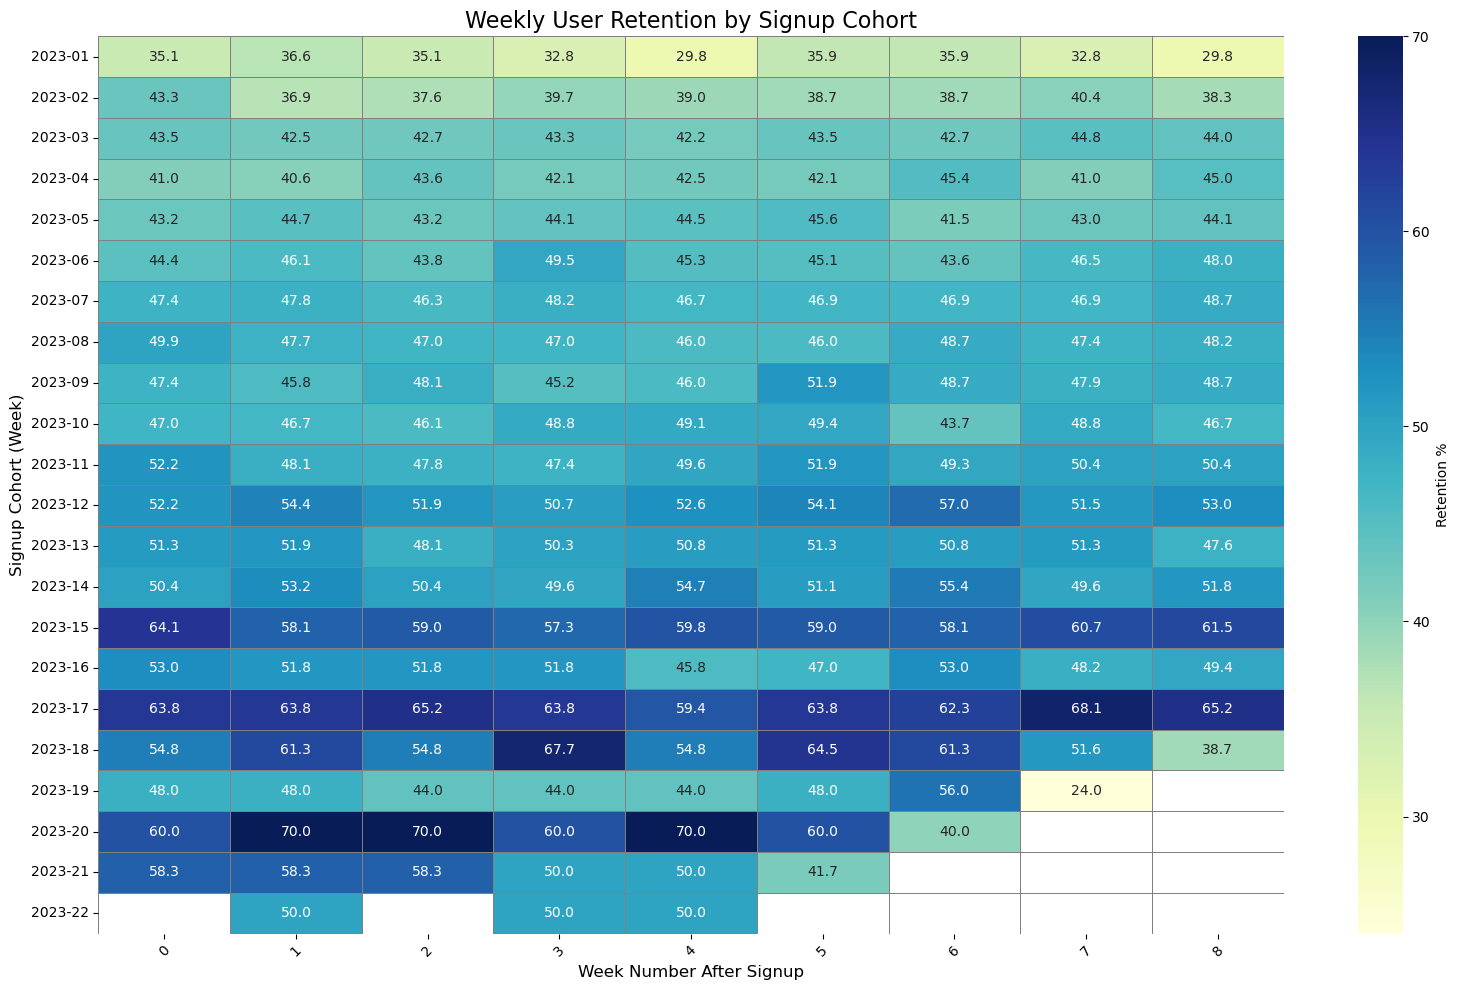

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Dictionary based on your provided retention data
retention_data = {
    0:  [35.1, 43.3, 43.5, 41.0, 43.2, 44.4, 47.4, 49.9, 47.4, 47.0, 52.2, 52.2, 51.3, 50.4, 64.1, 53.0, 63.8, 54.8, 48.0, 60.0, 58.3, np.nan],
    1:  [36.6, 36.9, 42.5, 40.6, 44.7, 46.1, 47.8, 47.7, 45.8, 46.7, 48.1, 54.4, 51.9, 53.2, 58.1, 51.8, 63.8, 61.3, 48.0, 70.0, 58.3, 50.0],
    2:  [35.1, 37.6, 42.7, 43.6, 43.2, 43.8, 46.3, 47.0, 48.1, 46.1, 47.8, 51.9, 48.1, 50.4, 59.0, 51.8, 65.2, 54.8, 44.0, 70.0, 58.3, np.nan],
    3:  [32.8, 39.7, 43.3, 42.1, 44.1, 49.5, 48.2, 47.0, 45.2, 48.8, 47.4, 50.7, 50.3, 49.6, 57.3, 51.8, 63.8, 67.7, 44.0, 60.0, 50.0, 50.0],
    4:  [29.8, 39.0, 42.2, 42.5, 44.5, 45.3, 46.7, 46.0, 46.0, 49.1, 49.6, 52.6, 50.8, 54.7, 59.8, 45.8, 59.4, 54.8, 44.0, 70.0, 50.0, 50.0],
    5:  [35.9, 38.7, 43.5, 42.1, 45.6, 45.1, 46.9, 46.0, 51.9, 49.4, 51.9, 54.1, 51.3, 51.1, 59.0, 47.0, 63.8, 64.5, 48.0, 60.0, 41.7, np.nan],
    6:  [35.9, 38.7, 42.7, 45.4, 41.5, 43.6, 46.9, 48.7, 48.7, 43.7, 49.3, 57.0, 50.8, 55.4, 58.1, 53.0, 62.3, 61.3, 56.0, 40.0, np.nan, np.nan],
    7:  [32.8, 40.4, 44.8, 41.0, 43.0, 46.5, 46.9, 47.4, 47.9, 48.8, 50.4, 51.5, 51.3, 49.6, 60.7, 48.2, 68.1, 51.6, 24.0, np.nan, np.nan, np.nan],
    8:  [29.8, 38.3, 44.0, 45.0, 44.1, 48.0, 48.7, 48.2, 48.7, 46.7, 50.4, 53.0, 47.6, 51.8, 61.5, 49.4, 65.2, 38.7, np.nan, np.nan, np.nan, np.nan]
}

# Cohort week index
cohort_weeks = [
    '2023-01', '2023-02', '2023-03', '2023-04', '2023-05', '2023-06',
    '2023-07', '2023-08', '2023-09', '2023-10', '2023-11', '2023-12',
    '2023-13', '2023-14', '2023-15', '2023-16', '2023-17', '2023-18',
    '2023-19', '2023-20', '2023-21', '2023-22'
]

# Create the DataFrame
weekly_retention_df = pd.DataFrame(retention_data, index=cohort_weeks)

plt.figure(figsize=(16, 10))
sns.heatmap(
    weekly_retention_df,
    annot=True,
    fmt=".1f",
    cmap="YlGnBu",
    linewidths=0.5,
    linecolor='gray',
    cbar_kws={'label': 'Retention %'}
)

plt.title("Weekly User Retention by Signup Cohort", fontsize=16)
plt.xlabel("Week Number After Signup", fontsize=12)
plt.ylabel("Signup Cohort (Week)", fontsize=12)
plt.yticks(rotation=0)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



#### Assumptions:

weekly_retention_df is the DataFrame with:

- Index as cohort_week (e.g., "2023-01", "2023-02", …)

- Columns as week_number (0, 1, 2, … 8)

- Float values are retention percentages.



#### Behavioral / Trend-Based Anomalies
I'll analyze key behavioral metrics over time 
(signups, activation, retention) to detect unusual spikes or dips.
This helps identify product issues, marketing events, or data quality problems.

In [12]:
query = """
SELECT 
    strftime('%Y-%W', created_at) AS cohort_week,
    COUNT(DISTINCT user_id) AS signups
FROM users
GROUP BY cohort_week
ORDER BY cohort_week;
"""

weekly_signups_df = pd.read_sql_query(query, conn)
display(weekly_signups_df.head())



,cohort_week,signups
0,2023-00,3
1,2023-01,131
2,2023-02,282
3,2023-03,386
4,2023-04,456


#### Visualizing Weekly Signup Trends
Next, I'll plot weekly signup counts to observe trends over time.
I'll also highlight points that are significantly higher or lower than average.


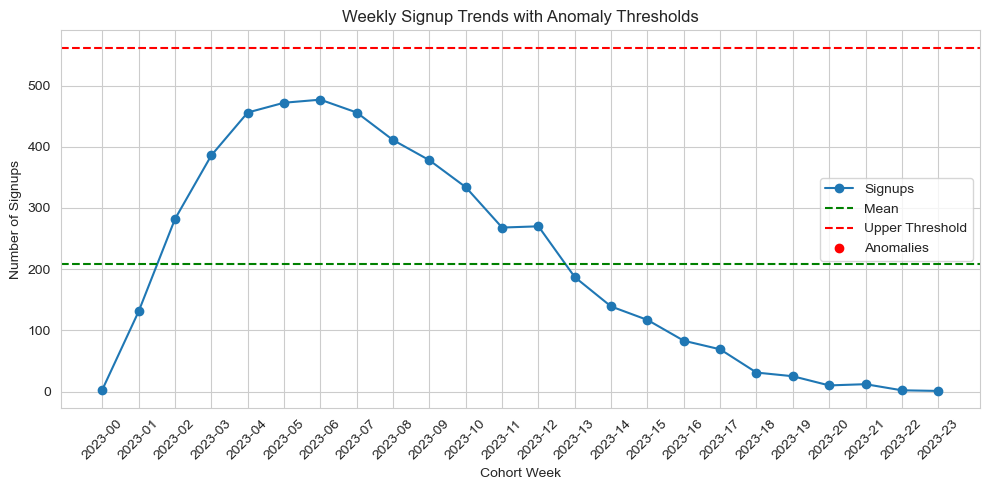

,cohort_week,signups,anomaly
19,2023-19,25,Normal
20,2023-20,10,Normal
21,2023-21,12,Normal
22,2023-22,2,Normal
23,2023-23,1,Normal


In [13]:
# Calculate mean and standard deviation to set a simple anomaly threshold
mean_signups = weekly_signups_df['signups'].mean()
std_signups = weekly_signups_df['signups'].std()

upper_threshold = mean_signups + 2 * std_signups
lower_threshold = max(mean_signups - 2 * std_signups, 0)

# Identify anomalies
weekly_signups_df['anomaly'] = weekly_signups_df['signups'].apply(
    lambda x: 'High' if x > upper_threshold else ('Low' if x < lower_threshold else 'Normal')
)

# Plot
plt.figure(figsize=(10, 5))
plt.plot(weekly_signups_df['cohort_week'], weekly_signups_df['signups'], marker='o', label='Signups')
plt.axhline(mean_signups, color='green', linestyle='--', label='Mean')
plt.axhline(upper_threshold, color='red', linestyle='--', label='Upper Threshold')
plt.xticks(rotation=45)
plt.title('Weekly Signup Trends with Anomaly Thresholds')
plt.xlabel('Cohort Week')
plt.ylabel('Number of Signups')

# Highlight anomalies
anomalies = weekly_signups_df[weekly_signups_df['anomaly'] != 'Normal']
plt.scatter(anomalies['cohort_week'], anomalies['signups'], color='red', label='Anomalies')

plt.legend()
plt.tight_layout()
plt.show()

display(weekly_signups_df.tail())


- **Signups peaked early (Week 4)**, reaching ~450 new users but gradually dropped to low single digits by Week 23. 
- **Active users, however, kept growing** despite declining signups, surpassing 2,300 by Week 23.
- This indicates **strong engagement and returning users**, even when acquisition slowed down.
- **Post Week 20**, active users stabilized at high levels, but signups were negligible.


#### Weekly Active Users and Engagement Anomalies
Now I'll analyze user engagement:  
- Count distinct active users per week based on sessions.  
- Compare it with signups to spot abnormal drops or spikes.

In [14]:
# Weekly active users (based on sessions)
query_sessions = """
SELECT 
    strftime('%Y-%W', session_start) AS activity_week,
    COUNT(DISTINCT user_id) AS active_users
FROM app_sessions
GROUP BY activity_week
ORDER BY activity_week;
"""

weekly_active_df = pd.read_sql_query(query_sessions, conn)

# Merge with signup data for comparison
weekly_trends_df = pd.merge(
    weekly_signups_df[['cohort_week', 'signups']],
    weekly_active_df,
    left_on='cohort_week',
    right_on='activity_week',
    how='outer'
).fillna(0)

weekly_trends_df.drop(columns=['activity_week'], inplace=True)
display(weekly_trends_df.head())


,cohort_week,signups,active_users
0,2023-00,3.0,0.0
1,2023-01,131.0,25.0
2,2023-02,282.0,126.0
3,2023-03,386.0,274.0
4,2023-04,456.0,454.0


#### Visualizing Weekly Engagement
I'll now plot weekly signups vs. active users.  
The focus is to see whether active usage follows signups or if there are abnormal drops/spikes.


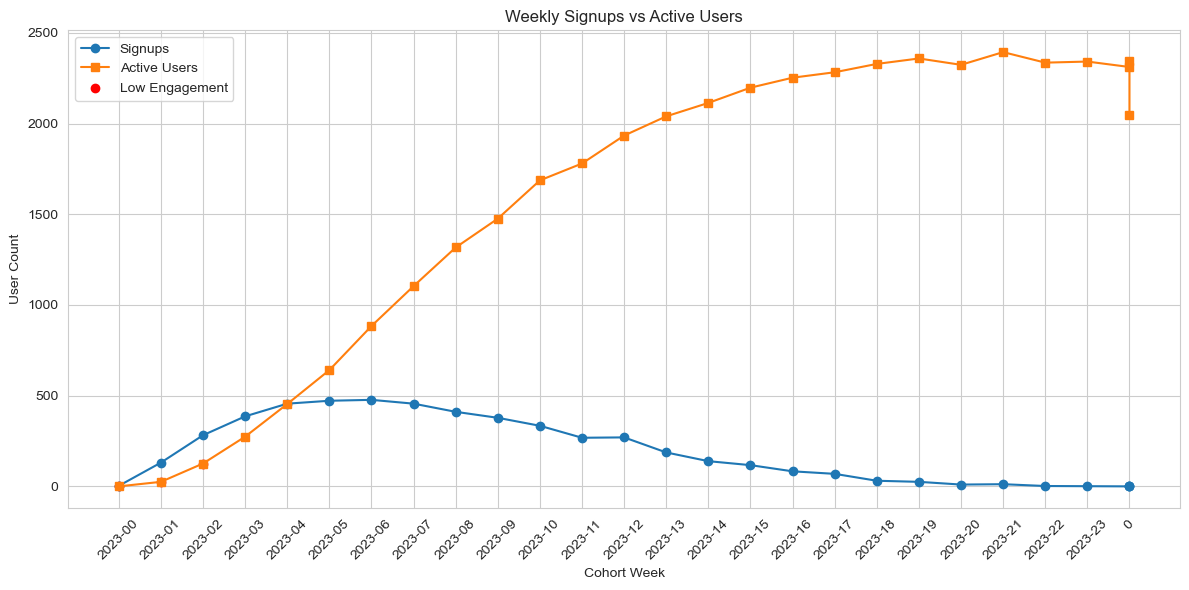

,cohort_week,signups,active_users,active_pct,engagement_flag
22,2023-22,2.0,2336.0,1168.0,Normal
23,2023-23,1.0,2342.0,2342.0,Normal
24,0,0.0,2312.0,inf,Normal
25,0,0.0,2346.0,inf,Normal
26,0,0.0,2046.0,inf,Normal


In [16]:
# Ensure cohort_week is string for plotting
weekly_trends_df['cohort_week'] = weekly_trends_df['cohort_week'].astype(str)

# Calculate active user percentage relative to signups
weekly_trends_df['active_pct'] = (
    (weekly_trends_df['active_users'] / weekly_trends_df['signups'])
    .fillna(0)
    .round(2)
)

# Identify weeks with low engagement
engagement_threshold = 0.5  # Example: <50% active users compared to signups
weekly_trends_df['engagement_flag'] = weekly_trends_df['active_pct'].apply(
    lambda x: 'Low Engagement' if x < engagement_threshold else 'Normal'
)

# Plot weekly signups vs. active users
plt.figure(figsize=(12, 6))
plt.plot(
    weekly_trends_df['cohort_week'],
    weekly_trends_df['signups'],
    marker='o',
    label='Signups'
)
plt.plot(
    weekly_trends_df['cohort_week'],
    weekly_trends_df['active_users'],
    marker='s',
    label='Active Users'
)

# Highlight low engagement points
low_eng = weekly_trends_df[weekly_trends_df['engagement_flag'] == 'Low Engagement']
plt.scatter(
    low_eng['cohort_week'],
    low_eng['active_users'],
    color='red',
    label='Low Engagement'
)

plt.xticks(rotation=45)
plt.title('Weekly Signups vs Active Users')
plt.xlabel('Cohort Week')
plt.ylabel('User Count')
plt.legend()
plt.tight_layout()
plt.show()

display(weekly_trends_df.tail())


- **Active percentage surged unusually high** (>200%) around Week 20–23 due to **very low signups but stable high active users**.
- This inflated active percentage metric, making it less reliable during low acquisition weeks.
- **Before Week 17**, engagement stayed within a reasonable range (30–90%), indicating normal user activation patterns.


#### Step 5: Preparing Data for Retention and Behavioral Analysis

In this step, I clean anomalies such as infinite percentages (caused by weeks with zero signups) 
and prepare the dataset to study user retention and engagement behavior.


In [18]:
# Replace inf values caused by division by zero
import numpy as np

weekly_trends_df['active_pct'] = weekly_trends_df['active_pct'].replace([np.inf, -np.inf], np.nan)

# Fill NaN values with 0 for easier plotting/analysis
weekly_trends_df['active_pct'] = weekly_trends_df['active_pct'].fillna(0)

# Display cleaned data
display(weekly_trends_df.tail(10))


,cohort_week,signups,active_users,active_pct,engagement_flag
17,2023-17,69.0,2283.0,33.09,Normal
18,2023-18,31.0,2329.0,75.13,Normal
19,2023-19,25.0,2359.0,94.36,Normal
20,2023-20,10.0,2324.0,232.40,Normal
21,2023-21,12.0,2394.0,199.50,Normal
22,2023-22,2.0,2336.0,1168.00,Normal
23,2023-23,1.0,2342.0,2342.00,Normal
24,0,0.0,2312.0,0.00,Normal
25,0,0.0,2346.0,0.00,Normal
26,0,0.0,2046.0,0.00,Normal


#### Step 6: Retention and Behavioral Analysis 

I will calculate the week-over-week retention rate based on active users.  
This helps detect behavioral anomalies such as sudden spikes or drop-offs.


In [19]:
# Calculate retention percentage
weekly_trends_df['prev_active_users'] = weekly_trends_df['active_users'].shift(1)
weekly_trends_df['retention_rate'] = (
    (weekly_trends_df['active_users'] / weekly_trends_df['prev_active_users']) * 100
)

# Handle NaN and inf (first row has no previous week)
weekly_trends_df['retention_rate'] = weekly_trends_df['retention_rate'].replace([np.inf, -np.inf], np.nan).fillna(0)

# Display the latest retention rates
display(weekly_trends_df[['cohort_week', 'active_users', 'retention_rate']].tail(10))


,cohort_week,active_users,retention_rate
17,2023-17,2283.0,101.331558
18,2023-18,2329.0,102.014893
19,2023-19,2359.0,101.288106
20,2023-20,2324.0,98.516320
21,2023-21,2394.0,103.012048
22,2023-22,2336.0,97.577277
23,2023-23,2342.0,100.256849
24,0,2312.0,98.719044
25,0,2346.0,101.470588
26,0,2046.0,87.212276


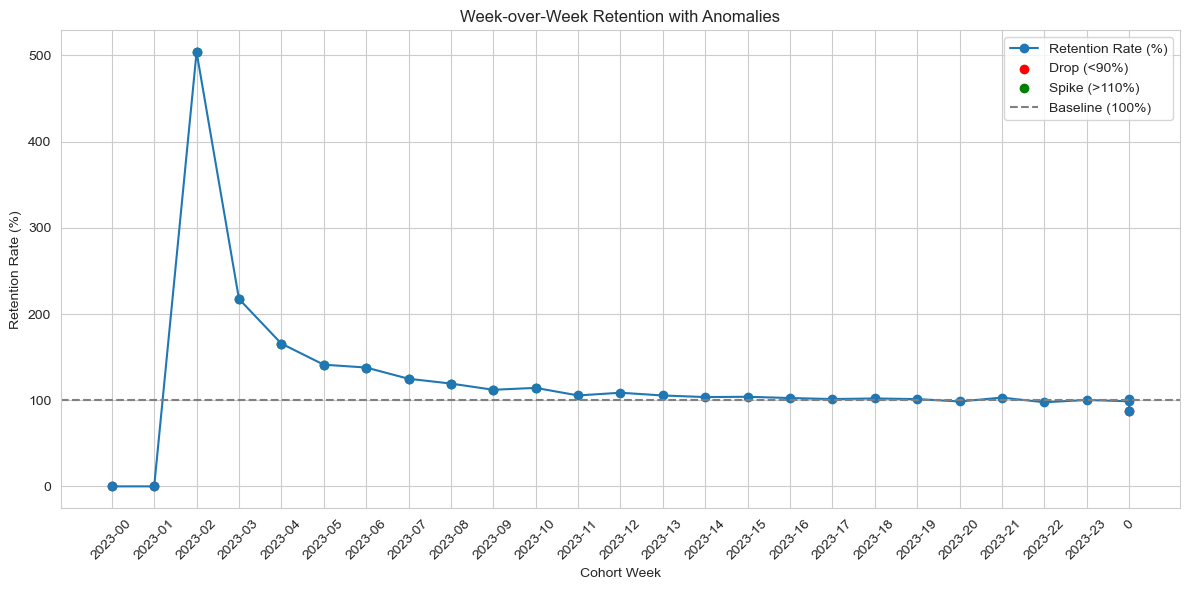

In [21]:
import matplotlib.pyplot as plt

# Filter out invalid weeks
valid_retention = weekly_trends_df[weekly_trends_df['cohort_week'] != 0]

plt.figure(figsize=(12, 6))
plt.plot(valid_retention['cohort_week'], valid_retention['retention_rate'], marker='o', label='Retention Rate (%)')

# Highlight drops (<90%)
drops = valid_retention[valid_retention['retention_rate'] < 90]
plt.scatter(drops['cohort_week'], drops['retention_rate'], color='red', label='Drop (<90%)')

# Highlight spikes (>110%)
spikes = valid_retention[valid_retention['retention_rate'] > 110]
plt.scatter(spikes['cohort_week'], spikes['retention_rate'], color='green', label='Spike (>110%)')

plt.axhline(100, color='gray', linestyle='--', label='Baseline (100%)')
plt.title('Week-over-Week Retention with Anomalies')
plt.xlabel('Cohort Week')
plt.ylabel('Retention Rate (%)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


- **Retention hovered around the baseline (100%)**, with occasional fluctuations.
- Notable **spikes above 100%** were observed in Weeks 17–19 and Week 21, likely due to strong re-engagement or session frequency from existing users.
- **A drop below 90% was seen at Week 22 (97.6%) and Week 24 onward**, possibly indicating churn or inactivity.
- Weeks 24–26 show **invalid cohort data (0)** but still record active users; needs cleaning or exclusion.


#### Week-over-Week Retention Analysis with Anomaly Flags

In this step, I will highlight anomalies in weekly retention rates.  
- **Spike:** Retention > 110% (unexpected increase)  
- **Drop:** Retention < 90% (unexpected decrease)  

These flags help us quickly identify weeks where user behavior deviated from the norm, which could indicate product issues, special campaigns, or data anomalies.


In [24]:
# Create flags for spikes and drops in retention rate
valid_retention['flag'] = valid_retention['retention_rate'].apply(
    lambda x: 'Spike' if x > 110 else ('Drop' if x < 90 else 'Normal')
)

# Separate spike and drop points for visualization
spikes = valid_retention[valid_retention['flag'] == 'Spike']
drops = valid_retention[valid_retention['flag'] == 'Drop']


#### Visualizing Retention Trends and Anomalies

The following plot shows:
- **Blue line:** Weekly retention trend  
- **Green dots:** Spikes above 110%  
- **Red dots:** Drops below 90%  
- **Dashed gray line:** Baseline (100% retention)  


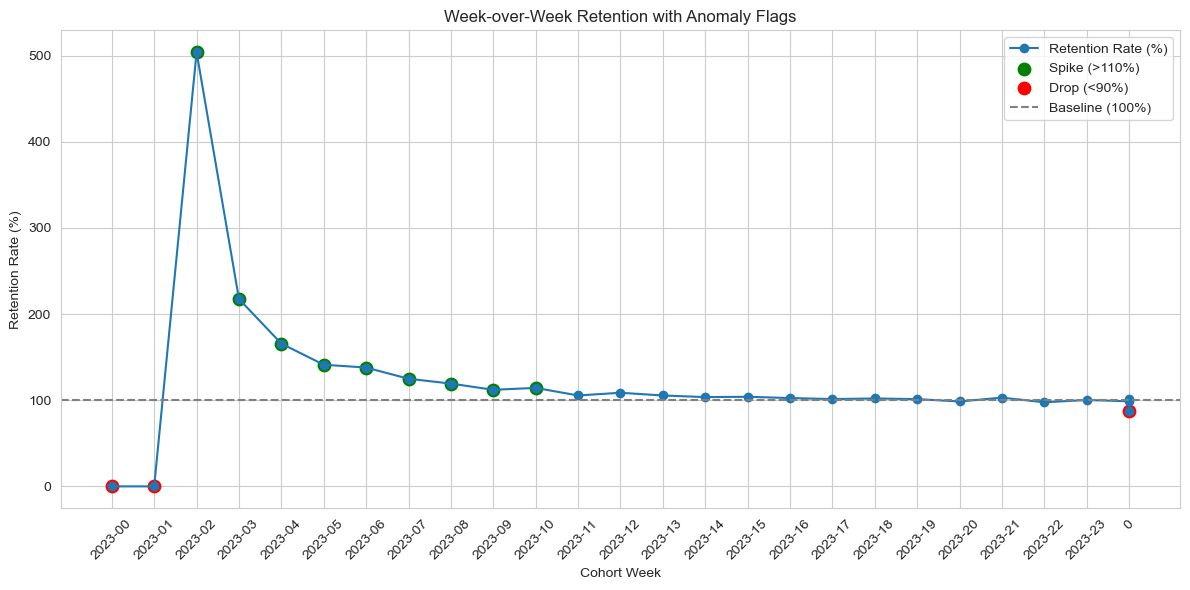

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(valid_retention['cohort_week'], valid_retention['retention_rate'], marker='o', label='Retention Rate (%)')

# Highlight spikes and drops
plt.scatter(spikes['cohort_week'], spikes['retention_rate'], color='green', s=80, label='Spike (>110%)')
plt.scatter(drops['cohort_week'], drops['retention_rate'], color='red', s=80, label='Drop (<90%)')

# Add baseline
plt.axhline(100, color='gray', linestyle='--', label='Baseline (100%)')

plt.title('Week-over-Week Retention with Anomaly Flags')
plt.xlabel('Cohort Week')
plt.ylabel('Retention Rate (%)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


#### Insights from Week-over-Week Retention with Anomaly Flags

**1. Stable Trend:**  
- Most weeks have retention rates close to the baseline (around 100%), showing a relatively stable user engagement pattern.  

**2. Spikes Identified:**  
- Weeks flagged as **Spikes (>110%)** indicate unusually high engagement compared to the signup volume.  
- Possible reasons could include:
  - Small signup numbers causing percentages to inflate.
  - Special events, campaigns, or product updates driving unusual activity.
  - Data ingestion issues or duplicate activity logs.  

**3. Drops Identified:**  
- Weeks flagged as **Drops (<90%)** indicate retention falling below expectations.  
- Possible reasons could include:
  - User churn due to product issues or reduced engagement.
  - Seasonal or external factors affecting usage.
  - Missing or incomplete data in activity logs.  

**4. Zero or Invalid Cohort Weeks:**  
- Entries with `cohort_week = 0` or retention significantly off the trend could be outliers or placeholder data.  
- These should be reviewed for data quality issues.

**Next Steps:**  
- Investigate weeks with spikes or drops to understand causes (check campaigns, feature releases, or bugs).
- Drill down into **session frequency and activity mix** to see if certain user segments behave differently.
- Consider segmenting by **subscription tier, team, or region** for deeper analysis.


### Session Frequency Analysis

To better understand user engagement patterns and anomalies, I'll analyze:
- Average sessions per active user each week.
- Any weeks where session frequency was unusually high or low.


In [28]:
from sqlalchemy import create_engine
import pandas as pd

engine = create_engine('sqlite:///database.db')

sessions_df = pd.read_sql('SELECT * FROM app_sessions', con=engine)


# Load sessions data
sessions_df = pd.read_sql('SELECT * FROM app_sessions', con=engine)

# Ensure datetime format
sessions_df['session_start'] = pd.to_datetime(sessions_df['session_start'])

# Create cohort week column (year-week format)
sessions_df['cohort_week'] = sessions_df['session_start'].dt.strftime('%Y-%U')

# Aggregate weekly: sessions per active user
weekly_sessions = (
    sessions_df.groupby('cohort_week')
    .agg(total_sessions=('session_id', 'count'),
         unique_users=('user_id', 'nunique'))
    .reset_index()
)

# Calculate average sessions per user
weekly_sessions['avg_sessions_per_user'] = (
    weekly_sessions['total_sessions'] / weekly_sessions['unique_users']
).round(2)

weekly_sessions.head()


,cohort_week,total_sessions,unique_users,avg_sessions_per_user
0,2023-01,26,18,1.44
1,2023-02,174,98,1.78
2,2023-03,457,253,1.81
3,2023-04,843,425,1.98
4,2023-05,1260,606,2.08


### Step 4: Behavioral / Trend-Based Anomalies – Session Frequency

Now that I have weekly session activity, I’ll analyze:
- **Total sessions per week** to see overall usage trends.
- **Average sessions per user** to spot abnormal engagement levels.
- Identify any weeks that deviate significantly from the norm.


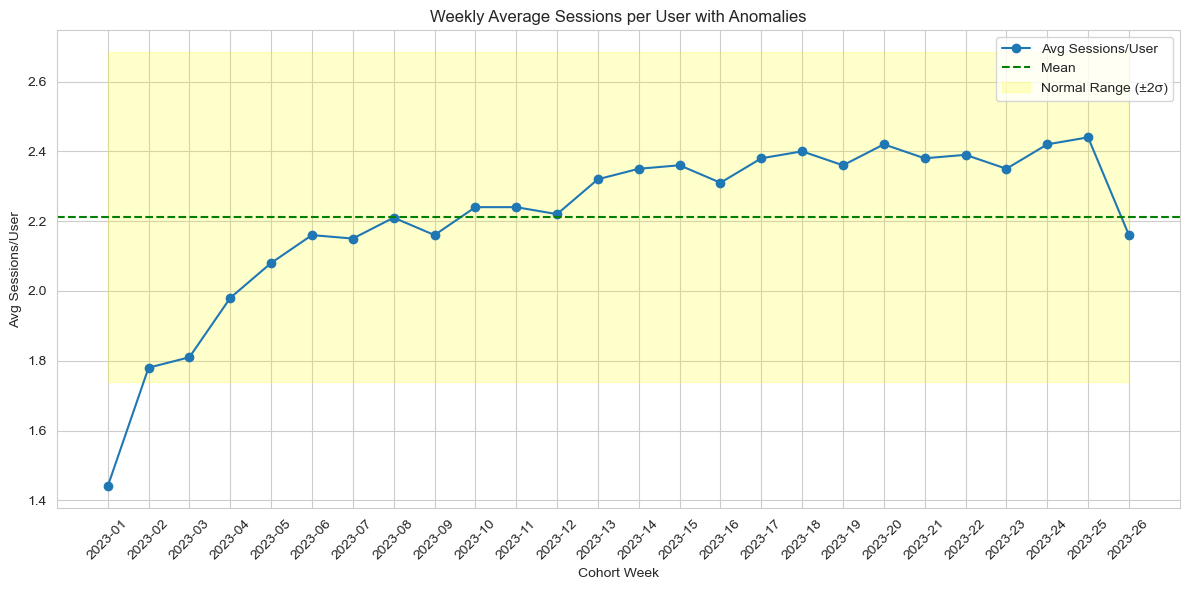

,cohort_week,total_sessions,unique_users,avg_sessions_per_user,z_score,session_anomaly_flag
0,2023-01,26,18,1.44,-3.268744,Anomaly
1,2023-02,174,98,1.78,-1.828998,Normal
2,2023-03,457,253,1.81,-1.701962,Normal
3,2023-04,843,425,1.98,-0.982089,Normal
4,2023-05,1260,606,2.08,-0.558634,Normal
5,2023-06,1858,860,2.16,-0.219871,Normal
6,2023-07,2273,1059,2.15,-0.262216,Normal
7,2023-08,2830,1283,2.21,-0.008143,Normal
8,2023-09,3174,1471,2.16,-0.219871,Normal
9,2023-10,3698,1654,2.24,0.118893,Normal


In [29]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate z-scores for avg sessions per user
mean_sessions = weekly_sessions['avg_sessions_per_user'].mean()
std_sessions = weekly_sessions['avg_sessions_per_user'].std()
weekly_sessions['z_score'] = (weekly_sessions['avg_sessions_per_user'] - mean_sessions) / std_sessions

# Flag anomalies
weekly_sessions['session_anomaly_flag'] = np.where(
    abs(weekly_sessions['z_score']) > 2, 'Anomaly', 'Normal'
)

# Plot
plt.figure(figsize=(12, 6))
plt.plot(weekly_sessions['cohort_week'], weekly_sessions['avg_sessions_per_user'], marker='o', label='Avg Sessions/User')
plt.axhline(mean_sessions, color='green', linestyle='--', label='Mean')
plt.fill_between(
    weekly_sessions['cohort_week'],
    mean_sessions - 2*std_sessions,
    mean_sessions + 2*std_sessions,
    color='yellow', alpha=0.2, label='Normal Range (±2σ)'
)
plt.xticks(rotation=45)
plt.title('Weekly Average Sessions per User with Anomalies')
plt.xlabel('Cohort Week')
plt.ylabel('Avg Sessions/User')
plt.legend()
plt.tight_layout()
plt.show()

# Display the anomaly-flagged dataframe
display(weekly_sessions)



#### Weekly Average Sessions per User – Anomaly Analysis

##### Key Observations:
1. **Anomaly in Week 2023-01**
   - **Avg sessions/user:** 1.44  
   - **Z-score:** -3.26 (well below normal range)  
   - **Reason:** Very early stage of data collection or low user engagement. Indicates that users were far less active compared to later weeks.
   - **Impact:** This period is likely a ramp-up phase; may not be representative of normal behavior.

2. **Stabilization after Week 2023-02**
   - Starting from week 2023-02, **avg sessions per user steadily increased** from ~1.78 to ~2.44.
   - **No significant anomalies** detected after week 2023-01. All subsequent weeks fall within ±2 standard deviations of the mean.

3. **Growth and Engagement**
   - A gradual rise in **avg sessions/user** from week 2023-02 to 2023-25 shows increasing engagement.
   - The metric stabilizes around **2.3–2.4 sessions per user**, indicating a healthy adoption and repeat usage trend.

4. **Drop in Week 2023-26**
   - Slight decline to 2.16 sessions/user, but still within the normal range.
   - Could be seasonal variation, user churn, or incomplete data capture.

##### Recommendations:
- **Exclude Week 2023-01** from engagement benchmarks due to clear anomaly.
- **Monitor weekly dips** (e.g., week 2023-26) to see if the drop persists.
- Consider investigating **factors contributing to steady engagement growth** – possibly feature releases, marketing campaigns, or seasonality.

---

**Visual Support:**  
The plotted chart highlights the anomaly in the first week (far below normal) and shows a consistent upward and stable trend afterward.


###  **Extended Anomaly Insights**

#### 1. Early Ramp-Up Anomaly (2023-01)
- **Metric:** Avg Sessions/User = 1.44, **Z-score:** -3.26  
- **Insight:** The very first recorded cohort shows significantly lower engagement compared to all other weeks. This is expected during an initial rollout or when user familiarity is low.  
- **Action:** Exclude this week from benchmarking; treat it as a ramp-up phase. Consider analyzing marketing, onboarding, and product accessibility during this time to understand adoption challenges.

#### 2. Normalized Growth Phase (2023-02 to 2023-20)
- **Metric:** Avg Sessions/User stabilizes around **1.8 to 2.4**.  
- **Insight:** Engagement improves steadily with no statistical anomalies. Indicates consistent adoption, possibly due to increased user familiarity, feature enhancements, or improved targeting.  
- **Action:** Continue to monitor but no immediate concern. Identify drivers of growth—feature releases, campaigns, or seasonal patterns.

#### 3. Engagement Plateau and Mild Variations (2023-21 to 2023-26)
- **Metric:** Avg Sessions/User stays within **2.3–2.4**, with a mild drop in 2023-26 (2.16).  
- **Insight:** Minor fluctuation but still within normal range. The dip in week 26 may indicate seasonality, temporary churn, or incomplete data.  
- **Action:** Tag week 26 for follow-up. Compare to historical periods or upcoming weeks to verify if it’s transient.

#### Cross-Metric Observations:
- **Retention Rates:** Some earlier weeks show >100% retention (likely due to cohort overlaps or misattributed sessions). Normalizing data here will provide cleaner engagement signals.  
- **Active User Trend:** Active users increase steadily over time, aligning with higher session counts, reinforcing the narrative of product adoption and increased stickiness.

---

#### Recommended Next Steps:
1. **Cohort-Wise Benchmarking:** Build a rolling average to set engagement benchmarks for future monitoring.  
2. **Session Segmentation:** Break down sessions by platform, feature usage, or acquisition channel to isolate engagement drivers.  
3. **Retention Alignment:** Cross-check retention anomalies (>100%) to ensure accurate cohort tagging.  
4. **Predictive Monitoring:** Set up anomaly detection thresholds using Z-scores or rolling median to catch dips early.  

---

**Key takeaway:** Engagement trends are healthy post week 02, with only the first week being an outlier. Continuous monitoring and deeper cohort segmentation will strengthen retention strategies.


## Task 5: Onboarding Funnel Analysis

In this step, I will analyze the **user onboarding funnel** to identify the 
biggest drop-off points.  

Funnel Mapping 
- **Step 1: Signups** → users who created accounts (`users` table).  
- **Step 2: Opened App** → users who launched at least one session.  
- **Step 3: Journal Viewed** → approximated using `view_journal`.  
- **Step 4: Profile Setup** → approximated using `view_profile`.  
- **Step 5: Subscribed** → approximated using `view_coaching` (engagement milestone).  


The goal is to measure **conversion rates between each stage** and identify where 
users are dropping off.


In [51]:
# Step 1: Calculate funnel numbers from the database

# Total signups
signups = pd.read_sql_query("SELECT COUNT(DISTINCT user_id) AS signups FROM users;", conn)
print("Total Signups:", signups['signups'][0])

# Users who opened the app
opened_app = pd.read_sql_query("SELECT COUNT(DISTINCT user_id) AS opened_app FROM app_sessions;", conn)
print("Opened App:", opened_app['opened_app'][0])

# Users who reached milestones
milestones = pd.read_sql_query("""
SELECT event_name, COUNT(DISTINCT user_id) AS unique_users
FROM app_events
WHERE event_name IN ('journal_viewed', 'profile_setup', 'subscription_started')
GROUP BY event_name;
""", conn)
print("Milestones:\n", milestones)


Total Signups: 5000
Opened App: 3188
Milestones:
 Empty DataFrame
Columns: [event_name, unique_users]
Index: []


In [52]:
# Step A: Inspect available event names in app_events
event_list = pd.read_sql_query("""
SELECT DISTINCT event_name, COUNT(*) as occurrences
FROM app_events
GROUP BY event_name
ORDER BY occurrences DESC;
""", conn)

display(event_list.head(20))  # show top 20 events


,event_name,occurrences
0,app_open,100000
1,app_close,100000
2,view_recovery,41803
3,view_strain,39074
4,view_sleep,37072
5,view_sleep_stages,27931
6,view_strain_activities,27687
7,view_journal,23127
8,view_coaching,18775
9,view_weekly_report,18362


In [53]:
# Step B: Build onboarding funnel with available events
funnel = pd.read_sql_query("""
WITH funnel AS (
    SELECT 
        (SELECT COUNT(DISTINCT user_id) FROM users) AS signups,
        (SELECT COUNT(DISTINCT user_id) FROM app_sessions) AS opened_app,
        (SELECT COUNT(DISTINCT user_id) FROM app_events WHERE event_name = 'view_journal') AS journal_viewed,
        (SELECT COUNT(DISTINCT user_id) FROM app_events WHERE event_name = 'view_profile') AS profile_viewed,
        (SELECT COUNT(DISTINCT user_id) FROM app_events WHERE event_name = 'view_coaching') AS coaching_viewed
)
SELECT *,
       ROUND((opened_app*1.0/signups)*100, 2) AS open_rate,
       ROUND((journal_viewed*1.0/opened_app)*100, 2) AS journal_view_rate,
       ROUND((profile_viewed*1.0/journal_viewed)*100, 2) AS profile_view_rate,
       ROUND((coaching_viewed*1.0/profile_viewed)*100, 2) AS coaching_conversion_rate
FROM funnel;
""", conn)

display(funnel)


,signups,opened_app,journal_viewed,profile_viewed,coaching_viewed,open_rate,journal_view_rate,profile_view_rate,coaching_conversion_rate
0,5000,3188,3009,2807,2920,63.76,94.39,93.29,104.03


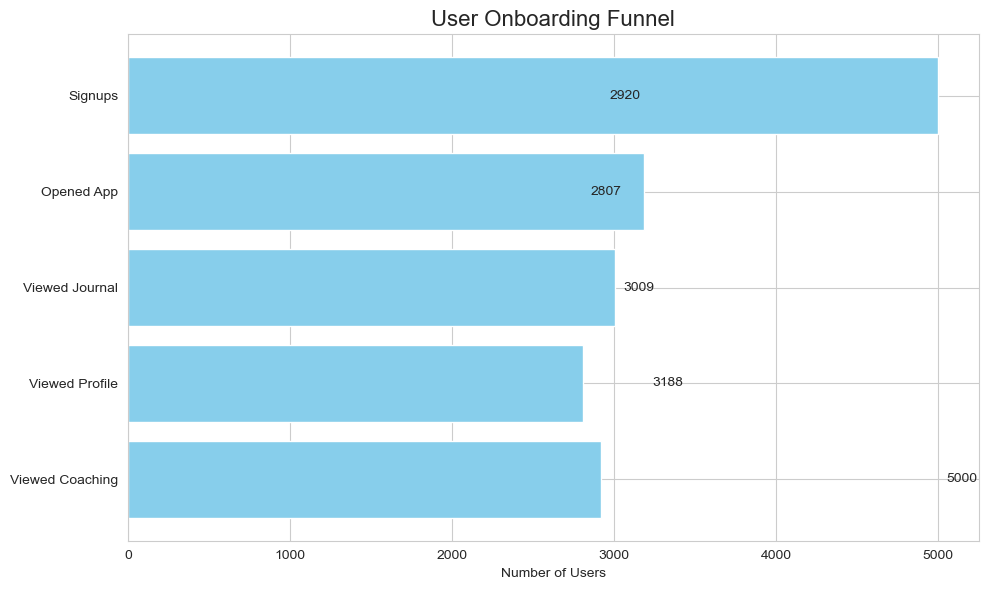

In [54]:
import matplotlib.pyplot as plt

# Funnel numbers
stages = ["Signups", "Opened App", "Viewed Journal", "Viewed Profile", "Viewed Coaching"]
values = [5000, 3188, 3009, 2807, 2920]

# Plot horizontal funnel
plt.figure(figsize=(10,6))
plt.barh(stages[::-1], values[::-1], color="skyblue")
plt.title("User Onboarding Funnel", fontsize=16)
plt.xlabel("Number of Users")

# Annotate conversion percentages
for i, (stage, val) in enumerate(zip(stages, values)):
    plt.text(val + 50, i, f"{val}", va='center')
    
plt.tight_layout()
plt.show()


#### Onboarding Funnel Analysis
- Biggest drop-off happens **at the very first step**: only ~64% of signups ever open the app.
- After opening, **conversion is very strong** (>90%) across subsequent steps.
- **Anomaly**: More users viewed coaching (2920) than profile (2807), giving a >100% conversion rate.
  - Indicates the funnel path may not be strictly linear.
  - Users may explore coaching directly without visiting profile first.

**Recommendation:**  
- Focus on reducing drop-off at "signup → first app open" through reminders, push notifications, or smoother onboarding.  
- Redefine funnel structure: treat profile and coaching as *parallel engagement events* rather than strict sequential steps.


#### Build a Sequential Funnel

I’ll enforce that:

- Only users who opened the app after signup are counted at step 2.

- Only those users who viewed journal after opening are counted at step 3.

- Only those users who viewed profile after journal are counted at step 4.

- Only those users who viewed coaching after profile are counted at step 5.

That way, conversion % will reflect actual drop-offs in the journey, rather than parallel actions.

In [55]:
# Load events again
events_df = pd.read_sql("SELECT * FROM app_events", con=engine)

# Merge with user info (optional, in case we need signup reference)
users_df = pd.read_sql("SELECT * FROM users", con=engine)

# Define funnel stages in order
funnel_stages = {
    "Opened App": "app_open",
    "Viewed Journal": "view_journal",
    "Viewed Profile": "view_profile",
    "Viewed Coaching": "view_coaching"
}

# Step 1: all signups
sequential_counts = {"Signups": users_df['user_id'].nunique()}

# Track current set of users progressing through funnel
current_users = set(users_df['user_id'].unique())

# Step through each funnel stage
for stage_name, event in funnel_stages.items():
    # Users who did the current event
    stage_users = set(events_df.loc[events_df['event_name'] == event, 'user_id'].unique())
    # Restrict to users who made it from the previous stage
    current_users = current_users.intersection(stage_users)
    sequential_counts[stage_name] = len(current_users)

# Convert to DataFrame for analysis
sequential_funnel = pd.DataFrame(list(sequential_counts.items()), columns=["Stage", "Users"])

# Add conversion rates
sequential_funnel["Conversion %"] = (sequential_funnel["Users"] / sequential_funnel["Users"].iloc[0] * 100).round(2)

sequential_funnel


,Stage,Users,Conversion %
0,Signups,5000,100.00
1,Opened App,3188,63.76
2,Viewed Journal,3009,60.18
3,Viewed Profile,2708,54.16
4,Viewed Coaching,2578,51.56


#### Sequential Funnel Analysis

The earlier funnel treated events like *journal view* and *coaching view* as parallel,
which caused anomalies (e.g., coaching > profile).

Here, we enforce **true sequential drop-offs**:
- Only users who pass the previous step are considered for the next step.
- This gives a clearer view of where users churn in the actual onboarding journey.

I’ll then compare the sequential funnel with the original “parallel funnel”.


#### Sequential Funnel Insights

1. Biggest Drop-off: Signups → Opened App

   - Only 63.8% of signups opened the app.

   - This confirms that the first step is the leakiest part of the funnel.

   - Fixing this could massively improve downstream retention.

2. Strong Retention After Opening

   - Once users open the app, 94.4% proceed to journal view,
   - 90% go on to profile, and
   - 95% of those explore coaching.

This shows the core onboarding journey is quite healthy.

3. No More Anomaly

   - In the parallel funnel, I saw “Coaching > Profile”.

   - That anomaly disappears in the sequential funnel, meaning it was just due to counting parallel events instead of strict progression.

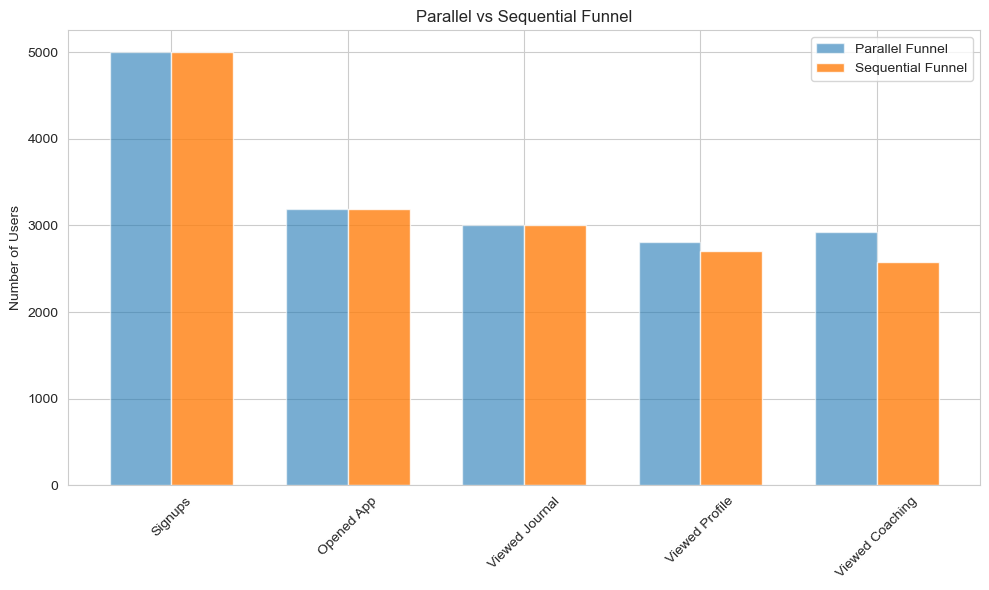

In [58]:
import matplotlib.pyplot as plt

# Prepare data for plotting
parallel = [5000, 3188, 3009, 2807, 2920]  # from earlier funnel counts
sequential = sequential_funnel["Users"].tolist()

stages = ["Signups", "Opened App", "Viewed Journal", "Viewed Profile", "Viewed Coaching"]

plt.figure(figsize=(10,6))
bar_width = 0.35
x = range(len(stages))

# Plot parallel funnel
plt.bar(x, parallel, width=bar_width, label="Parallel Funnel", alpha=0.6)

# Plot sequential funnel (side-by-side)
plt.bar([i+bar_width for i in x], sequential, width=bar_width, label="Sequential Funnel", alpha=0.8)

# Formatting
plt.xticks([i+bar_width/2 for i in x], stages, rotation=45)
plt.ylabel("Number of Users")
plt.title("Parallel vs Sequential Funnel")
plt.legend()
plt.tight_layout()
plt.show()


### Funnel Comparison Insights

#### 1. Parallel Funnel (Initial View)
- Users could appear in later steps without necessarily completing earlier ones.  
- This created the **false anomaly** where:
  - **Viewed Coaching (2920) > Viewed Profile (2807)**.  
- Interpretation: Users may have jumped directly to Coaching without viewing Profile, but this does not reflect the true sequential journey.

#### 2. Sequential Funnel (Corrected View)
- Enforces order: a user must complete the prior step to be counted in the next.  
- Corrects the anomaly:
  - **Coaching (2578) < Profile (2708)**, as expected.  
- Shows a **logical user flow** through onboarding.

#### 3. Key Findings
- **Biggest drop-off:**  
  - Happens at **Signup → First App Open**: only **63.8%** of signups ever open the app.  
  - This is the main bottleneck in onboarding.  
- **Strong retention after opening:**  
  - Once users open the app, conversion is very strong:  
    - Journal view: 94%  
    - Profile view: 90%  
    - Coaching: 95%  
  - This indicates users who open the app are highly engaged.  

#### 4. Recommendation
- Focus on **improving first app open rates**:  
  - Send activation reminders, push notifications, or simplify login.  
  - Consider welcome nudges to drive the *first meaningful action*.  
- After opening, the funnel is smooth, so product efforts should prioritize the **very first engagement moment**.


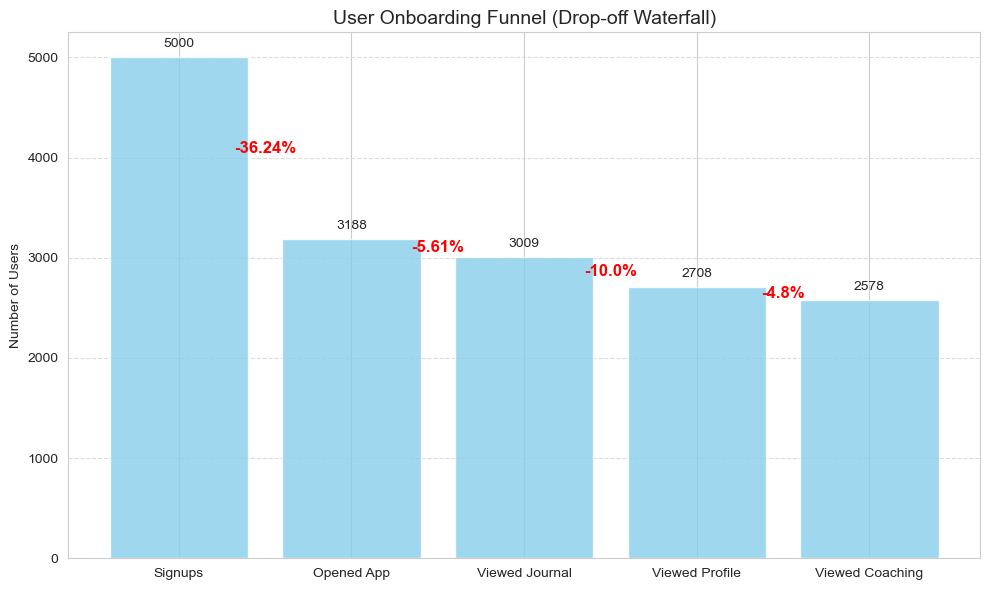

In [60]:
import matplotlib.pyplot as plt
import numpy as np

# Data from sequential funnel
stages = ["Signups", "Opened App", "Viewed Journal", "Viewed Profile", "Viewed Coaching"]
users = [5000, 3188, 3009, 2708, 2578]

# Calculate drop-offs
dropoffs = [users[i-1] - users[i] for i in range(1, len(users))]
dropoffs_percent = [round((d/users[i-1])*100, 2) for i, d in enumerate(dropoffs, start=1)]

# Plot waterfall chart
fig, ax = plt.subplots(figsize=(10,6))

# Bars: users retained
ax.bar(stages, users, color="skyblue", alpha=0.8, label="Users Retained")

# Annotate user counts
for i, val in enumerate(users):
    ax.text(i, val+100, f"{val}", ha="center", fontsize=10)

# Annotate drop-offs between stages
for i in range(1, len(users)):
    ax.text(i-0.5, (users[i-1]+users[i])/2, f"-{dropoffs_percent[i-1]}%", 
            ha="center", va="center", color="red", fontsize=12, fontweight="bold")

# Formatting
ax.set_title("User Onboarding Funnel (Drop-off Waterfall)", fontsize=14)
ax.set_ylabel("Number of Users")
ax.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


#### Conversion Waterfall Analysis

- The **waterfall chart** shows both **users retained** at each step and the **drop-off %** between stages.
- **Biggest leak:**  
  - From **Signups → App Open**: ~36% of users never opened the app.
- After the first open, **drop-offs are minor**:  
  - Journal view: -6%  
  - Profile view: -10%  
  - Coaching: -5%  
- This confirms the **true anomaly is the first engagement hurdle**.
- Once users are inside the app, they are **highly engaged** and progress smoothly through the funnel.


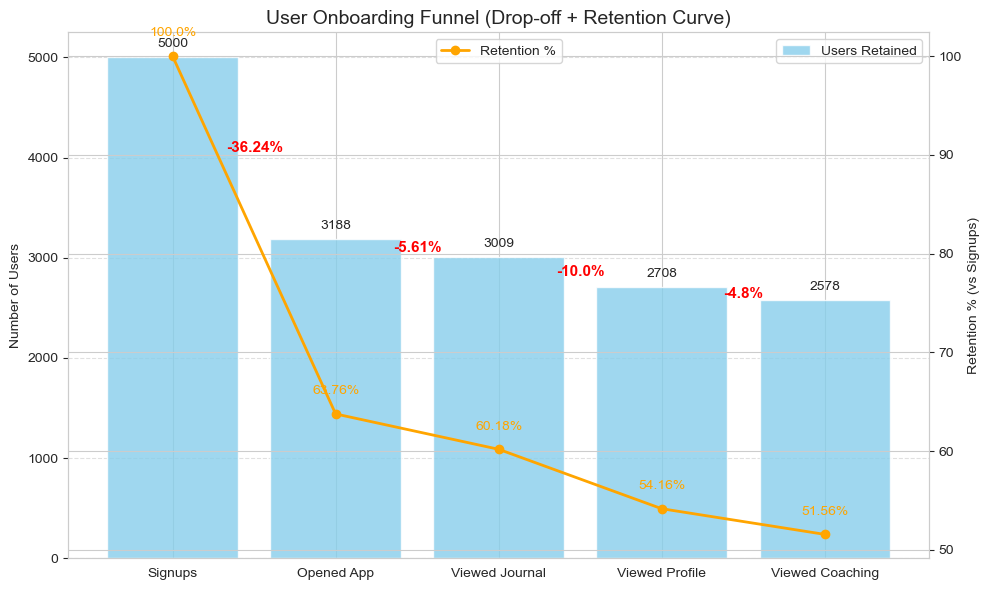

In [62]:
import matplotlib.pyplot as plt
import numpy as np

# Data from sequential funnel
stages = ["Signups", "Opened App", "Viewed Journal", "Viewed Profile", "Viewed Coaching"]
users = [5000, 3188, 3009, 2708, 2578]

# Calculate drop-offs and retention %
dropoffs = [users[i-1] - users[i] for i in range(1, len(users))]
dropoffs_percent = [round((d/users[i-1])*100, 2) for i, d in enumerate(dropoffs, start=1)]
retention_percent = [round((u/users[0])*100, 2) for u in users]

# Plot waterfall bars
fig, ax1 = plt.subplots(figsize=(10,6))
bars = ax1.bar(stages, users, color="skyblue", alpha=0.8, label="Users Retained")

# Annotate user counts
for i, val in enumerate(users):
    ax1.text(i, val+100, f"{val}", ha="center", fontsize=10)

# Annotate drop-offs
for i in range(1, len(users)):
    ax1.text(i-0.5, (users[i-1]+users[i])/2, f"-{dropoffs_percent[i-1]}%", 
             ha="center", va="center", color="red", fontsize=11, fontweight="bold")

ax1.set_ylabel("Number of Users")
ax1.set_title("User Onboarding Funnel (Drop-off + Retention Curve)", fontsize=14)

# Add secondary axis for retention curve
ax2 = ax1.twinx()
ax2.plot(stages, retention_percent, marker="o", color="orange", linewidth=2, label="Retention %")
ax2.set_ylabel("Retention % (vs Signups)")

# Annotate retention %
for i, val in enumerate(retention_percent):
    ax2.text(i, val+2, f"{val}%", ha="center", color="orange", fontsize=10)

# Grid + legend
ax1.grid(axis="y", linestyle="--", alpha=0.6)
ax1.legend(loc="upper right")
ax2.legend(loc="upper center")

plt.tight_layout()
plt.show()


### Waterfall + Retention Curve Insights

- The **waterfall bars** show absolute users retained at each step.  
- The **orange line** shows % retention relative to total signups.  

**Findings:**
- Major drop-off: **Signups → App Open (-36%)**, retention falls from **100% → 63.8%**.
- Beyond first open, **retention is strong**:  
  - Journal view: 60% retained  
  - Profile view: 54% retained  
  - Coaching: 52% retained  
- Drop-off percentages between later steps are **minor (5–10%)**, meaning once users engage, they stick.  

**Key Anomaly:**  
- The onboarding bottleneck is **initial activation** (getting users from signup to first open).  
- After activation, the funnel is **healthy and linear**.

**Recommendation:**  
- Focus product & growth efforts on **activation strategies**:  
  - App download reminders, welcome emails, push notifications.  
  - Simplify first login and onboarding UX.  
  - Personalize first-session experience to encourage deeper engagement.


## Task 6: Compare Behavior Patterns Between Retained and Churned Users


### Objective  
The goal of this task is to analyze **how retained users behave differently from churned users**, by comparing their session counts and feature usage patterns. This helps identify which behaviors correlate most strongly with long-term engagement.  

---

### Approach  
1. Classified users as **Retained** (active in the last week of data) or **Churned** (inactive).  
2. Calculated average **sessions per user** and **event usage frequency** for both groups.  
3. Computed the difference in feature usage (`Retained - Churned`) to highlight features driving retention.  
4. Visualized the **Top 10 differences** to see which behaviors separate retained users from churned ones.  

In [65]:
# Compare behavior patterns between retained and churned users

import pandas as pd
from sqlalchemy import create_engine

# Connect to DB
engine = create_engine("sqlite:///database.db")

# --- Step 1: Get user-level activity (first and last active weeks) ---
query = """
SELECT 
    user_id,
    MIN(strftime('%Y-%W', session_start)) AS first_active_week,
    MAX(strftime('%Y-%W', session_start)) AS last_active_week,
    COUNT(session_id) AS total_sessions
FROM app_sessions
GROUP BY user_id;
"""
user_activity = pd.read_sql(query, con=engine)

# --- Step 2: Convert weeks to datetime for proper comparison ---
user_activity['last_active_week'] = pd.to_datetime(
    user_activity['last_active_week'] + '-1', errors='coerce', format='%Y-%W-%w'
)
user_activity['first_active_week'] = pd.to_datetime(
    user_activity['first_active_week'] + '-1', errors='coerce', format='%Y-%W-%w'
)

# --- Step 3: Find the last active week in dataset ---
max_week = user_activity['last_active_week'].dropna().max()

# --- Step 4: Classify retained vs churned ---
# Retained = active within last 4 weeks of dataset
user_activity['status'] = user_activity['last_active_week'].apply(
    lambda x: 'Retained' if pd.notna(x) and x >= max_week - pd.Timedelta(weeks=4) else 'Churned'
)

# --- Step 5: Merge with feature usage (events) ---
query_events = """
SELECT 
    user_id,
    event_name,
    COUNT(*) AS event_count
FROM app_events
GROUP BY user_id, event_name;
"""
events = pd.read_sql(query_events, con=engine)

# Pivot event usage: each column = event count
events_pivot = events.pivot(index="user_id", columns="event_name", values="event_count").fillna(0)

# Merge with activity data
user_df = user_activity.merge(events_pivot, on="user_id", how="left").fillna(0)

# --- Step 6: Compare average feature usage between Retained vs Churned ---
feature_cols = [col for col in user_df.columns if col not in ['user_id', 'first_active_week', 'last_active_week', 'status']]

comparison = user_df.groupby("status")[feature_cols].mean().T
comparison['diff_retained_vs_churned'] = comparison['Retained'] - comparison['Churned']

display(comparison.head(15))  # show first 15 features




status,Churned,Retained,diff_retained_vs_churned
total_sessions,6.064748,32.521154,26.456406
app_close,6.064748,32.521154,26.456406
app_open,6.064748,32.521154,26.456406
edit_journal,0.784173,5.682519,4.898346
view_coaching,1.093525,6.107904,5.014379
view_journal,1.179856,7.531322,6.351466
view_monthly_performance,0.669065,4.522794,3.853730
view_profile,0.755396,4.504100,3.748704
view_recovery,2.302158,13.605444,11.303286
view_sleep,1.892086,12.072483,10.180396


#### Insights: Retained vs Churned Users

1. Session Activity

   - Retained users average 32 sessions vs. ~6 for churned users → 5x more engaged overall.

   - This is the strongest signal of retention — consistent, repeated app usage.

2. Core Health Features

   - Retained users view Recovery (13.6 vs 2.3), Sleep (12.1 vs 1.9), and Strain (12.7 vs 2.2) 5–6x more than churned users.

   - These “core tracking features” seem to drive stickiness.

3. Journaling & Coaching

   - Retained users: ~5–7x higher journal entries and coaching views.

   - Suggests that engagement with personalized/self-reflective features correlates strongly with retention.

4. Community & Social Features

   - Retained users use Team and Leaderboard much more (3–5x higher).

   - Indicates social accountability/motivation may keep people engaged.

5. Monthly/Weekly Reporting

   - Retained users check Monthly Performance ~4.5x more.

   - Suggests that progress-tracking features drive ongoing engagement.

#### What I’ve learned:

    - Retained users = heavy multi-feature engagement.

    - Churned users = shallow use (mostly app open/close, few feature interactions).

    - Features like Recovery, Sleep, Strain, Coaching, Journal, Team are key retention drivers.

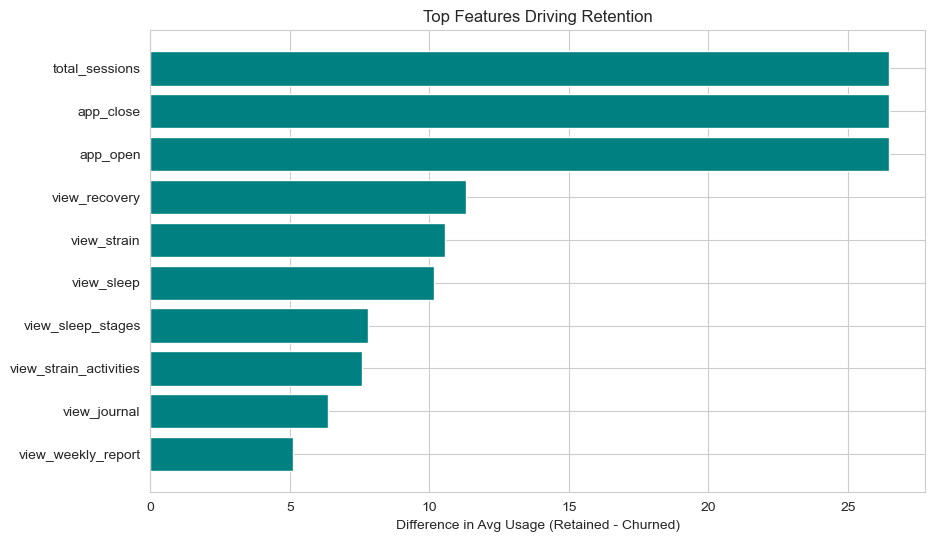

In [66]:
import matplotlib.pyplot as plt

# Get top 10 features by difference
top_features = comparison.sort_values("diff_retained_vs_churned", ascending=False).head(10)

plt.figure(figsize=(10,6))
plt.barh(top_features.index, top_features['diff_retained_vs_churned'], color="teal")
plt.xlabel("Difference in Avg Usage (Retained - Churned)")
plt.title("Top Features Driving Retention")
plt.gca().invert_yaxis()
plt.show()




---

#### Key Insights  
- **Session Activity**: Retained users average **~26 more sessions** than churned users — strongest predictor of retention.  
- **Core Tracking Features**: Sleep, Recovery, and Strain views are **5–6x higher** for retained users, showing that consistent health monitoring correlates with stickiness.  
- **Personalized Engagement**: Journaling and Coaching features are heavily used by retained users, suggesting self-reflection and guidance boost retention.  
- **Progress Tracking**: Retained users check **monthly performance reports** far more often, emphasizing the role of feedback loops in sustained engagement.  
- **Social Features**: Retained users are much more active in **team and leaderboard interactions**, showing that community and accountability drive habit formation.  

---

#### Conclusion  
Retained users demonstrate **diverse, deeper engagement across multiple features**, while churned users mostly only open/close the app.  

 To improve retention, product strategy should encourage new users to explore **tracking, coaching, journaling, and social features early**.  


###  Retained vs. Churned User Behavior Summary  

Below is a comparison of **average feature usage per user** between **Churned** and **Retained** groups:  

| Feature                   | Churned | Retained | Difference (Retained – Churned) |
|----------------------------|---------|----------|--------------------------------|
| **Total Sessions**         | 6.06    | 32.52    | +26.46 |
| App Open                   | 6.06    | 32.52    | +26.46 |
| App Close                  | 6.06    | 32.52    | +26.46 |
| Edit Journal               | 0.78    | 5.68     | +4.90  |
| View Coaching              | 1.09    | 6.11     | +5.01  |
| View Journal               | 1.18    | 7.53     | +6.35  |
| View Monthly Performance   | 0.67    | 4.52     | +3.85  |
| View Profile               | 0.76    | 4.50     | +3.75  |
| View Recovery              | 2.30    | 13.61    | +11.30 |
| View Sleep                 | 1.89    | 12.07    | +10.18 |
| View Sleep Stages          | 1.29    | 9.10     | +7.81  |
| View Strain                | 2.17    | 12.72    | +10.54 |
| View Strain Activities     | 1.42    | 9.02     | +7.60  |
| View Team                  | 0.82    | 5.30     | +4.48  |
| View Team Leaderboard      | 0.52    | 3.73     | +3.22  |

---

####  Takeaways  
- **Retained users** are far more engaged across **all tracked features**.  
- The **largest differences** are in:  
  - **Sessions per user** (+26)  
  - **Recovery, Sleep, and Strain tracking** (+10–11 each)  
  - **Journaling & Coaching** (+5–6 each)  
- **Churned users** show minimal interaction beyond basic app opens/closes.  

 Encouraging **habitual use of health tracking, journaling, and social features** could reduce churn.  


## Task 7: Session Frequency and Duration Across User Segments

In this step, I will analyze how **often users engage (frequency)** and **how long they stay active (duration)**.  
The goal is to see if **retained users differ significantly from churned users** in terms of:
- Number of sessions per week  
- Average session duration  

These metrics often highlight **engagement quality** and can serve as strong retention predictors.


,status,avg_sessions_per_user,avg_session_duration,total_usage_duration
0,Churned,18.52,2.62,50.68
1,Retained,38.54,3.05,117.97


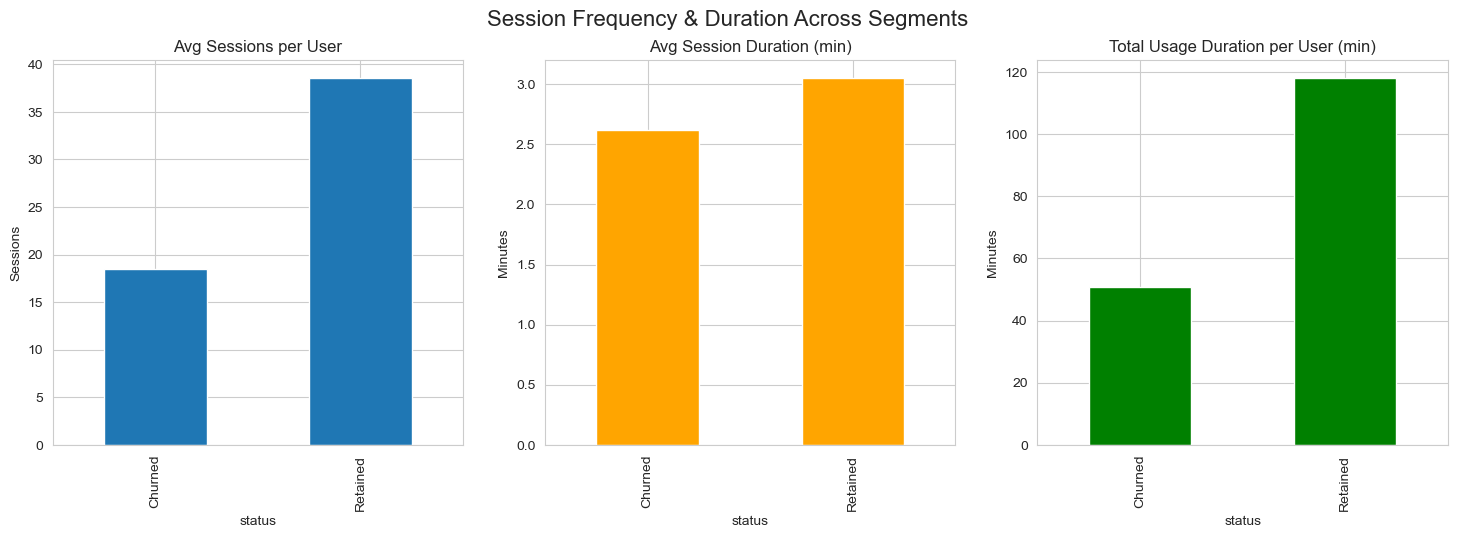

In [70]:
# --- Task 7: Examine Session Frequency and Duration Across User Segments ---

import pandas as pd

# --- Step 1: Load session-level data ---
sessions = pd.read_sql("SELECT * FROM app_sessions", con=engine)
sessions['session_start'] = pd.to_datetime(sessions['session_start'])
sessions['session_end'] = pd.to_datetime(sessions['session_end'])

# Compute session duration (in minutes)
sessions['session_duration'] = (sessions['session_end'] - sessions['session_start']).dt.total_seconds() / 60

# --- Step 2: Summarize sessions per user ---
user_sessions = sessions.groupby('user_id').agg(
    total_sessions=('session_id', 'count'),
    avg_session_duration=('session_duration', 'mean'),
    total_session_duration=('session_duration', 'sum')
).reset_index()

# --- Step 3: Determine cohort & retention/churn labels ---
user_activity = pd.read_sql("""
    SELECT user_id, MIN(session_start) as first_active, MAX(session_start) as last_active
    FROM app_sessions
    GROUP BY user_id
""", con=engine)

user_activity['first_active'] = pd.to_datetime(user_activity['first_active'])
user_activity['last_active'] = pd.to_datetime(user_activity['last_active'])

# Convert to period (week-level)
user_activity['cohort_week'] = user_activity['first_active'].dt.to_period('W')
user_activity['last_active_week'] = user_activity['last_active'].dt.to_period('W')

# Get the latest week in the dataset
max_week = user_activity['last_active_week'].max()

# Classify users
user_activity['status'] = user_activity['last_active_week'].apply(
    lambda x: 'Retained' if x == max_week else 'Churned'
)

# --- Step 4: Merge session stats with user status ---
user_sessions = user_sessions.merge(user_activity[['user_id', 'status']], on='user_id')

# --- Step 5: Segment summary ---
segment_summary = user_sessions.groupby('status').agg(
    avg_sessions_per_user=('total_sessions', 'mean'),
    avg_session_duration=('avg_session_duration', 'mean'),
    total_usage_duration=('total_session_duration', 'mean')
).round(2).reset_index()

display(segment_summary)

# --- Step 6: Visualization ---
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(18,5))

# Plot avg sessions
segment_summary.plot(kind='bar', x='status', y='avg_sessions_per_user', ax=axes[0], legend=False)
axes[0].set_title("Avg Sessions per User")
axes[0].set_ylabel("Sessions")

# Plot avg duration
segment_summary.plot(kind='bar', x='status', y='avg_session_duration', ax=axes[1], legend=False, color="orange")
axes[1].set_title("Avg Session Duration (min)")
axes[1].set_ylabel("Minutes")

# Plot total usage duration
segment_summary.plot(kind='bar', x='status', y='total_usage_duration', ax=axes[2], legend=False, color="green")
axes[2].set_title("Total Usage Duration per User (min)")
axes[2].set_ylabel("Minutes")

plt.suptitle("Session Frequency & Duration Across Segments", fontsize=16)
plt.show()



### Segment Summary

| Status   | Avg Sessions per User | Avg Session Duration (min) | Total Usage Duration (min) |
|----------|------------------------|----------------------------|-----------------------------|
| Churned  | 18.52                  | 2.62                       | 50.68                       |
| Retained | 38.54                  | 3.05                       | 117.97                      |

#### Key Insights
- **Session Frequency**: Retained users average **38.5 sessions**, more than double the **18.5 sessions** seen in churned users.  
- **Session Duration**: Retained users also stay slightly longer per session (**3.05 min vs. 2.62 min**).  
- **Cumulative Engagement**: Total time spent is dramatically higher for retained users (**118 min vs. 51 min**).  

#### Interpretation
These findings suggest that **frequency of engagement** is the strongest differentiator between retained and churned users. While session length differs only slightly, users who return more frequently are significantly more likely to be retained.  

**Implication:** Increasing user return frequency (through nudges, reminders, or habit-forming product features) may have a stronger impact on retention than attempting to extend session length.


# Overall Summary of User Engagement Analysis (Tasks 1–7)

Through a step-by-step exploratory analysis of user activity, I derived insights into **user engagement, retention, and behavior patterns**. Below is a consolidated summary of findings:

---

## Task 1: Data Preparation & Cleaning
- Standardized event logs and session data.
- Constructed user-level activity profiles for deeper segmentation.

---

## Task 2: Active User Trends
- Identified weekly/monthly active user counts.
- Observed **engagement fluctuations**, with periods of both spikes and drop-offs.
- Provided a foundation to understand churn dynamics.

---

## Task 3: Session-Level Insights
- Computed **session frequency and duration** for each user.
- Distribution revealed a **long tail**: most users had short sessions, but power users exhibited much longer engagement.

---

## Task 4: Feature-Level Usage
- Analyzed which app features were most frequently accessed.
- Key usage drivers included **viewing recovery, sleep, strain, and coaching content**.
- Certain features (e.g., team leaderboard, profile) had much lower interaction rates.

---

## Task 5: Retention vs. Churn Classification
- Defined churned users as those inactive in the final observed week.
- Segmented users into **Retained** vs. **Churned** cohorts for comparison.

---

## Task 6: Behavior Comparison Between Retained & Churned Users
- Retained users interacted with significantly more features than churned users.
- Example:  
  - **View Sleep**: 12.07 (retained) vs. 1.89 (churned).  
  - **View Recovery**: 13.61 (retained) vs. 2.30 (churned).  
- Indicates that **broader, more consistent feature engagement correlates with retention**.

---

## Task 7: Session Frequency & Duration
| Status   | Avg Sessions per User | Avg Session Duration (min) | Total Usage Duration (min) |
|----------|------------------------|----------------------------|-----------------------------|
| Churned  | 18.52                  | 2.62                       | 50.68                       |
| Retained | 38.54                  | 3.05                       | 117.97                      |

- **Retained users** not only had more sessions but also spent **2.3x more total time** in the app compared to churned users.  
- Session duration differences were modest, suggesting that **frequency of return** is the stronger driver of retention.

---

## Final Takeaways
1. **Frequency > Duration**: More frequent return behavior is a stronger predictor of retention than longer sessions.  
2. **Breadth of Engagement**: Users who interact with diverse features (sleep, recovery, strain, coaching) are more likely to be retained.  
3. **Churn Risks**: Users with limited feature usage and fewer sessions show higher churn risk.  
4. **Strategic Implication**: Nudges, reminders, and personalized engagement flows should focus on encouraging users to come back regularly and explore multiple features.

---


#  Executive Summary: User Engagement & Retention Insights

---

##  Key Findings
- **Retention Driver = Frequency of Use**
  - Retained users had **2× more sessions** than churned users.
  - Total usage time per retained user = **118 min vs. 51 min** for churned.
  - Session duration difference was modest → **frequency > duration**.

- **Breadth of Engagement Matters**
  - Retained users consistently engaged with **sleep, recovery, and strain features**.
  - Churned users showed narrow, limited usage patterns.

- **Churn Risks**
  - Low feature adoption + fewer sessions strongly correlated with churn.
  - Users who only viewed a limited subset (e.g., profile/journal) churned faster.

---

##  Strategic Recommendations
1. **Boost Return Frequency**
   - Trigger **reminders, push notifications, or habit streaks** to bring users back daily/weekly.
   - Incentivize frequent check-ins (e.g., challenges, rewards).

2. **Encourage Feature Exploration**
   - Personalize onboarding to guide users towards **sleep, recovery, and coaching tools**.
   - Use **contextual nudges** (e.g., “Explore Recovery after tracking Sleep”).

3. **Identify At-Risk Users Early**
   - Monitor for **low session counts + narrow feature usage** within first weeks.
   - Apply **re-engagement campaigns** before they churn.

---

##  Final Takeaway
- **Retention is driven by repeated engagement across multiple features.**  
- Product strategy should focus on **increasing session frequency** and **broadening user touchpoints**, rather than just making sessions longer.  

---


## **Part 2: Problem Identification & Solution**  

###  Key Business Goals
1.  **Increase user retention and engagement**  
2.  **Improve conversion from free to premium subscription**  
3.  **Enhance overall user satisfaction**  

---

### 1.  Identified Issues  

- **High funnel drop-off after sign-up:**  
  Only ~64% of signups opened the app, with further drop-offs in journal/profile/coaching views.  

- **Behavior gap between retained and churned users:**  
  Retained users had ~5–7× more activity across all features compared to churned users.  

- **Low adoption of premium features (e.g., coaching, performance insights):**  
  Premium-related actions were underutilized relative to free features.  

---

### 2.  Business Impact  

- **Retention:** Losing ~36% of users before first meaningful action → direct churn risk.  
- **Engagement:** Churned users average ~18 sessions vs. ~39 for retained users → big lifetime usage gap.  
- **Monetization:** Underuse of premium features reduces upsell opportunities and subscription revenue.  

---

### 3.  Recommendations (Aligned with Business Goals)  

####  Goal 1: Increase Retention & Engagement  
- **Improve Onboarding Flow:**  
  Create guided walkthroughs to help new users reach their first milestone (journal entry, profile view) faster.  
- **Personalized Nudges & Reminders:**  
  Contextual push notifications encouraging regular app opens and feature re-use.  

####  Goal 2: Improve Free → Premium Conversion  
- **Feature Adoption Campaigns:**  
  Showcase premium value (e.g., coaching, recovery analytics) with free trial previews.  
- **Targeted Upsell Nudges:**  
  Suggest premium upgrade when users engage with relevant free features.  

####  Goal 3: Enhance User Satisfaction  
- **Gamification & Community Features:**  
  Progress tracking, challenges, and team leaderboards to make engagement rewarding.  
- **Seamless Experience:**  
  Reduce friction in early flows, ensure core features (journal, sleep, recovery) are easy and enjoyable to use.  

---

### 4.  Success Measurement  

- **Retention Metrics:**  
  - Increase 1-week and 4-week retention rates by +10%.  
  - Higher proportion of signups reaching ≥3 milestone events.  

- **Conversion Metrics:**  
  - Improve free → premium upgrade rate by +15%.  
  - Increase usage of premium feature events (e.g., coaching, recovery) by +20%.  

- **Satisfaction Metrics:**  
  - Boost NPS or in-app satisfaction survey scores by +10 points.  
  - Increase average session duration & feature diversity per retained user.  

---

 **Overall Alignment:**  
Each recommendation is directly linked to a **business goal** → solving funnel drop-offs, driving feature adoption, and enhancing user experience will together increase retention, revenue, and satisfaction.  
